In [1]:
import re
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def Courant_number(simulation_case):
    logfile = Path(simulation_case,"log.icoFoamColored")

    # Regex patterns for the time and Courant number lines
    time_re = re.compile(r"^Time\s*=\s*([0-9.eE+-]+)")
    courant_re = re.compile(r"^Courant Number mean:\s*([0-9.eE+-]+)\s*max:\s*([0-9.eE+-]+)")

    data = []           # will hold dicts: {"time": ..., "Co_mean": ..., "Co_max": ...}
    current_time = None

    with logfile.open() as f:
        for line in f:
            line = line.strip()

            # 1) Parse time line
            m_time = time_re.match(line)
            if m_time:
                current_time = float(m_time.group(1))
                continue

            # 2) Parse Courant Number line (associated with the latest time we saw)
            m_courant = courant_re.match(line)
            if m_courant and current_time is not None:
                co_mean = float(m_courant.group(1))
                co_max  = float(m_courant.group(2))
                data.append({
                    "time": current_time,
                    "Co_mean": co_mean,
                    "Co_max": co_max
                })

    time = [entry["time"] for entry in data]
    Co_mean = [entry["Co_mean"] for entry in data]; Co_max = [entry["Co_max"] for entry in data]

    cm = 1/2.54
    plt.figure(dpi=600, figsize=(16*cm,8*cm))

    plt.plot(time,Co_mean, label="mean")
    plt.plot(time,Co_max, label="max")

    plt.xlabel("Time $\mathtt{[s]}$")
    plt.ylabel("Courant number")

    plt.legend()
    plt.grid()
    
    plt.tight_layout()
    path_plot = Path(simulation_case) / "postProcessing" / "plots"
    path_plot.mkdir(exist_ok=True, parents=True)
    plt.savefig(path_plot / "Courant_number_plot.png")
    plt.show()

<>:41: SyntaxWarning: invalid escape sequence '\m'
<>:41: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_50006/914296291.py:41: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel("Time $\mathtt{[s]}$")


In [3]:
def continuity_errors(simulation_case):

    # Read the file
    df = pd.read_csv(simulation_case+"/postProcessing/contErr/0/continuityError.dat", sep=r"\s+", comment="#", header=None,
                    names=["Time", "Local", "Global", "Cumulative"])

    # Prepare plot
    cm = 1/2.54
    plt.figure(dpi=600, figsize=(16*cm,8*cm))

    plt.plot(df["Time"], np.abs(df["Local"]), 'k', label="Local")
    plt.plot(df["Time"], np.abs(df["Global"]), 'r', label="Global")
    plt.plot(df["Time"], np.abs(df["Cumulative"]), 'g', label="Cumulative")

    plt.yscale("log")
    plt.xlabel("Time $\mathtt{[s]}$")
    plt.ylabel("|Continuity error|")
    plt.legend()
    plt.grid(True, which="both", ls="--", alpha=0.5)

    plt.tight_layout()
    path_plot = Path(simulation_case) / "postProcessing" / "plots"
    path_plot.mkdir(exist_ok=True, parents=True)
    plt.savefig(path_plot / "continuityError_plot.png")
    plt.show()

<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_50006/2748504033.py:16: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel("Time $\mathtt{[s]}$")


In [4]:
def computation_time(simulation_case):

    # Read the file
    df = pd.read_csv(simulation_case+"/postProcessing/runtime/0/timeInfo.dat", sep=r"\s+", comment="#", header=None,
                    names=["Time", "cpuTime", "cpu_step", "clock_step"])

    # Prepare plot
    cm = 1/2.54
    plt.figure(dpi=600, figsize=(16*cm,8*cm))

    plt.plot(df["Time"], np.abs(df["cpu_step"]), 'k', label="Local")

    plt.yscale("log")
    plt.xlabel("Timestep")
    plt.ylabel("CPU time/step")
    plt.legend()
    plt.grid(True, which="both", ls="--", alpha=0.5)

    plt.tight_layout()
    path_plot = Path(simulation_case) / "postProcessing" / "plots"
    path_plot.mkdir(exist_ok=True, parents=True)
    plt.savefig(path_plot / "computation_time_plot.png")
    plt.show()

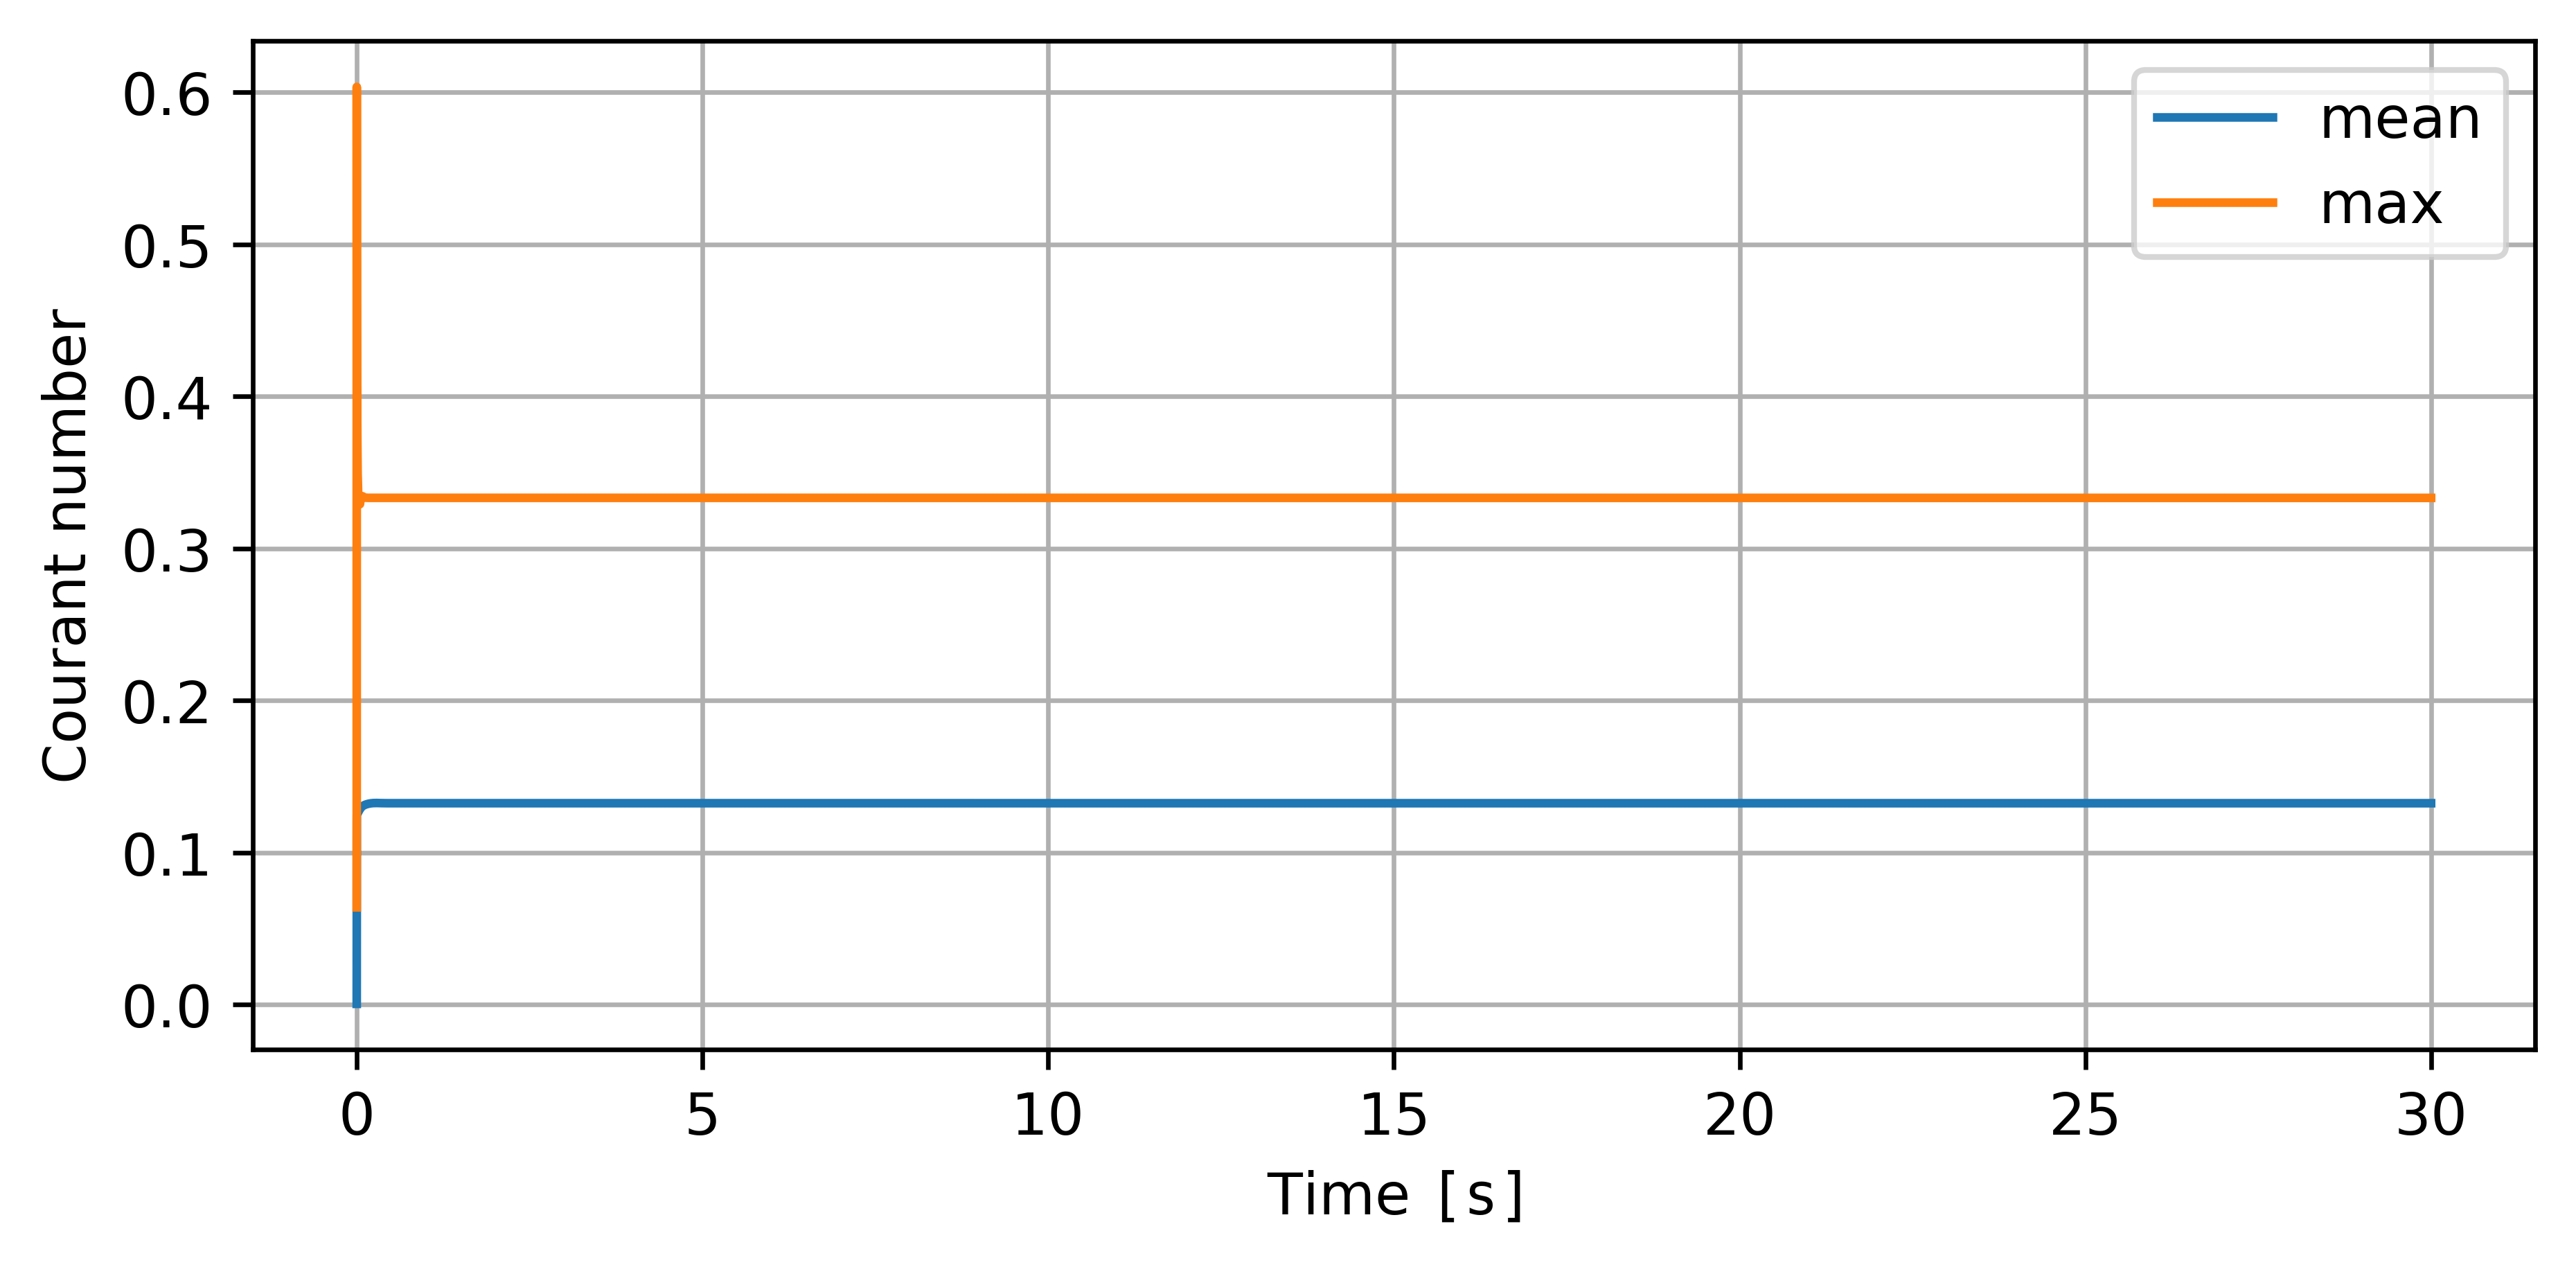

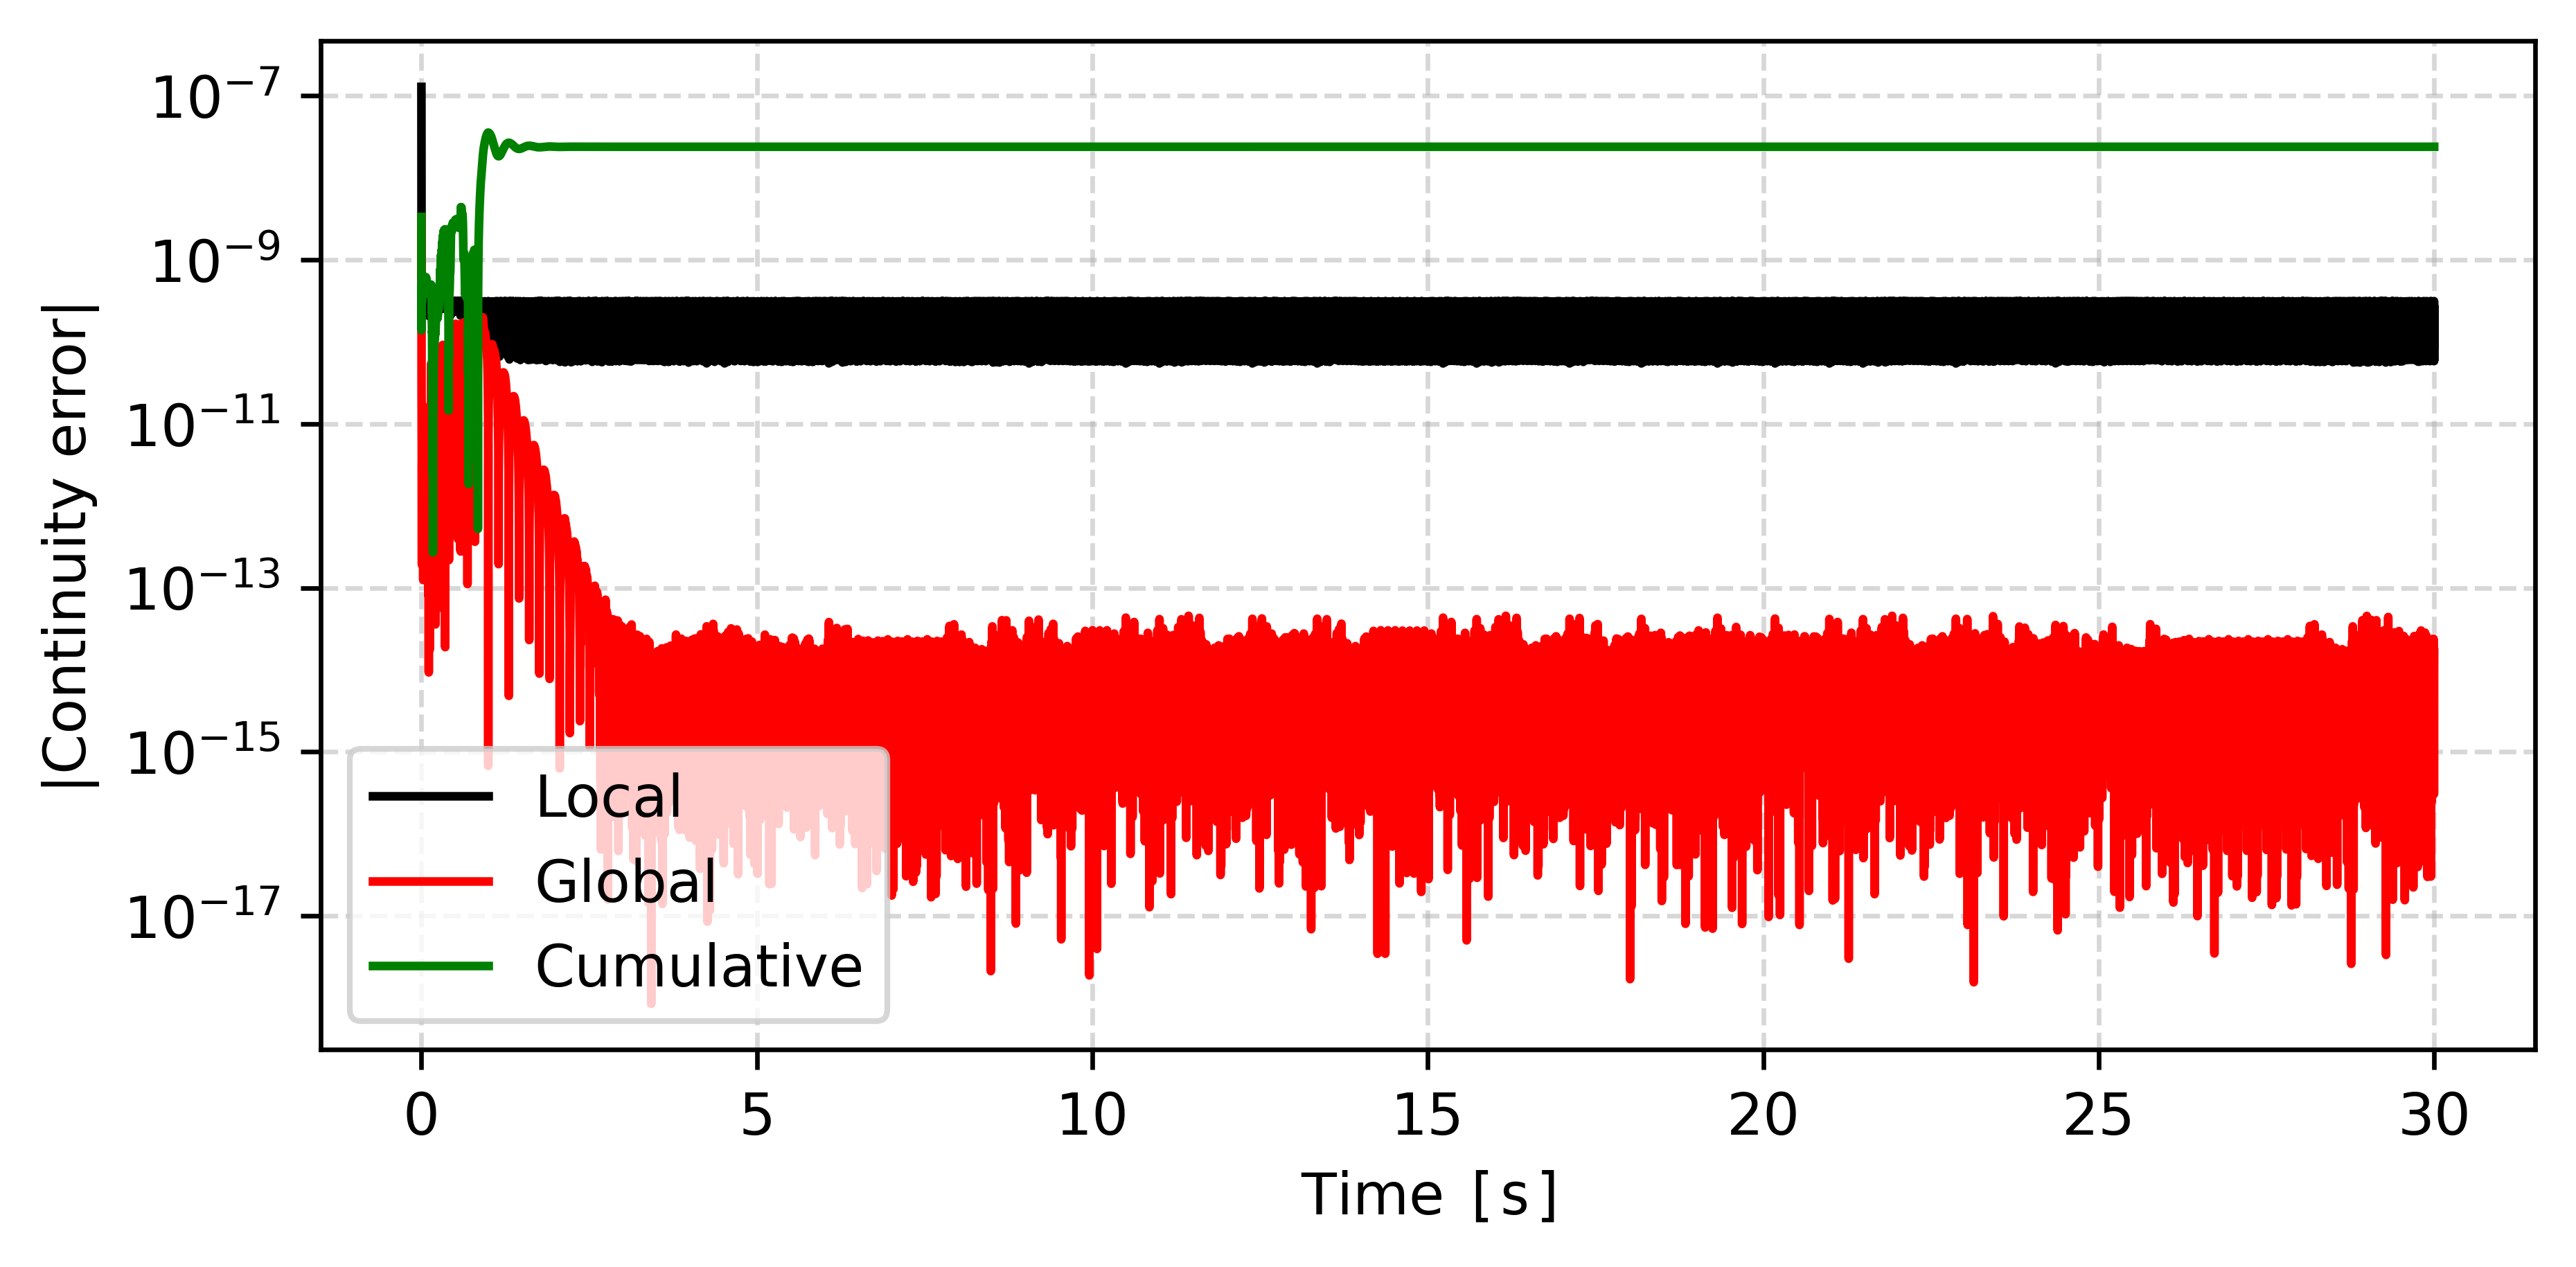

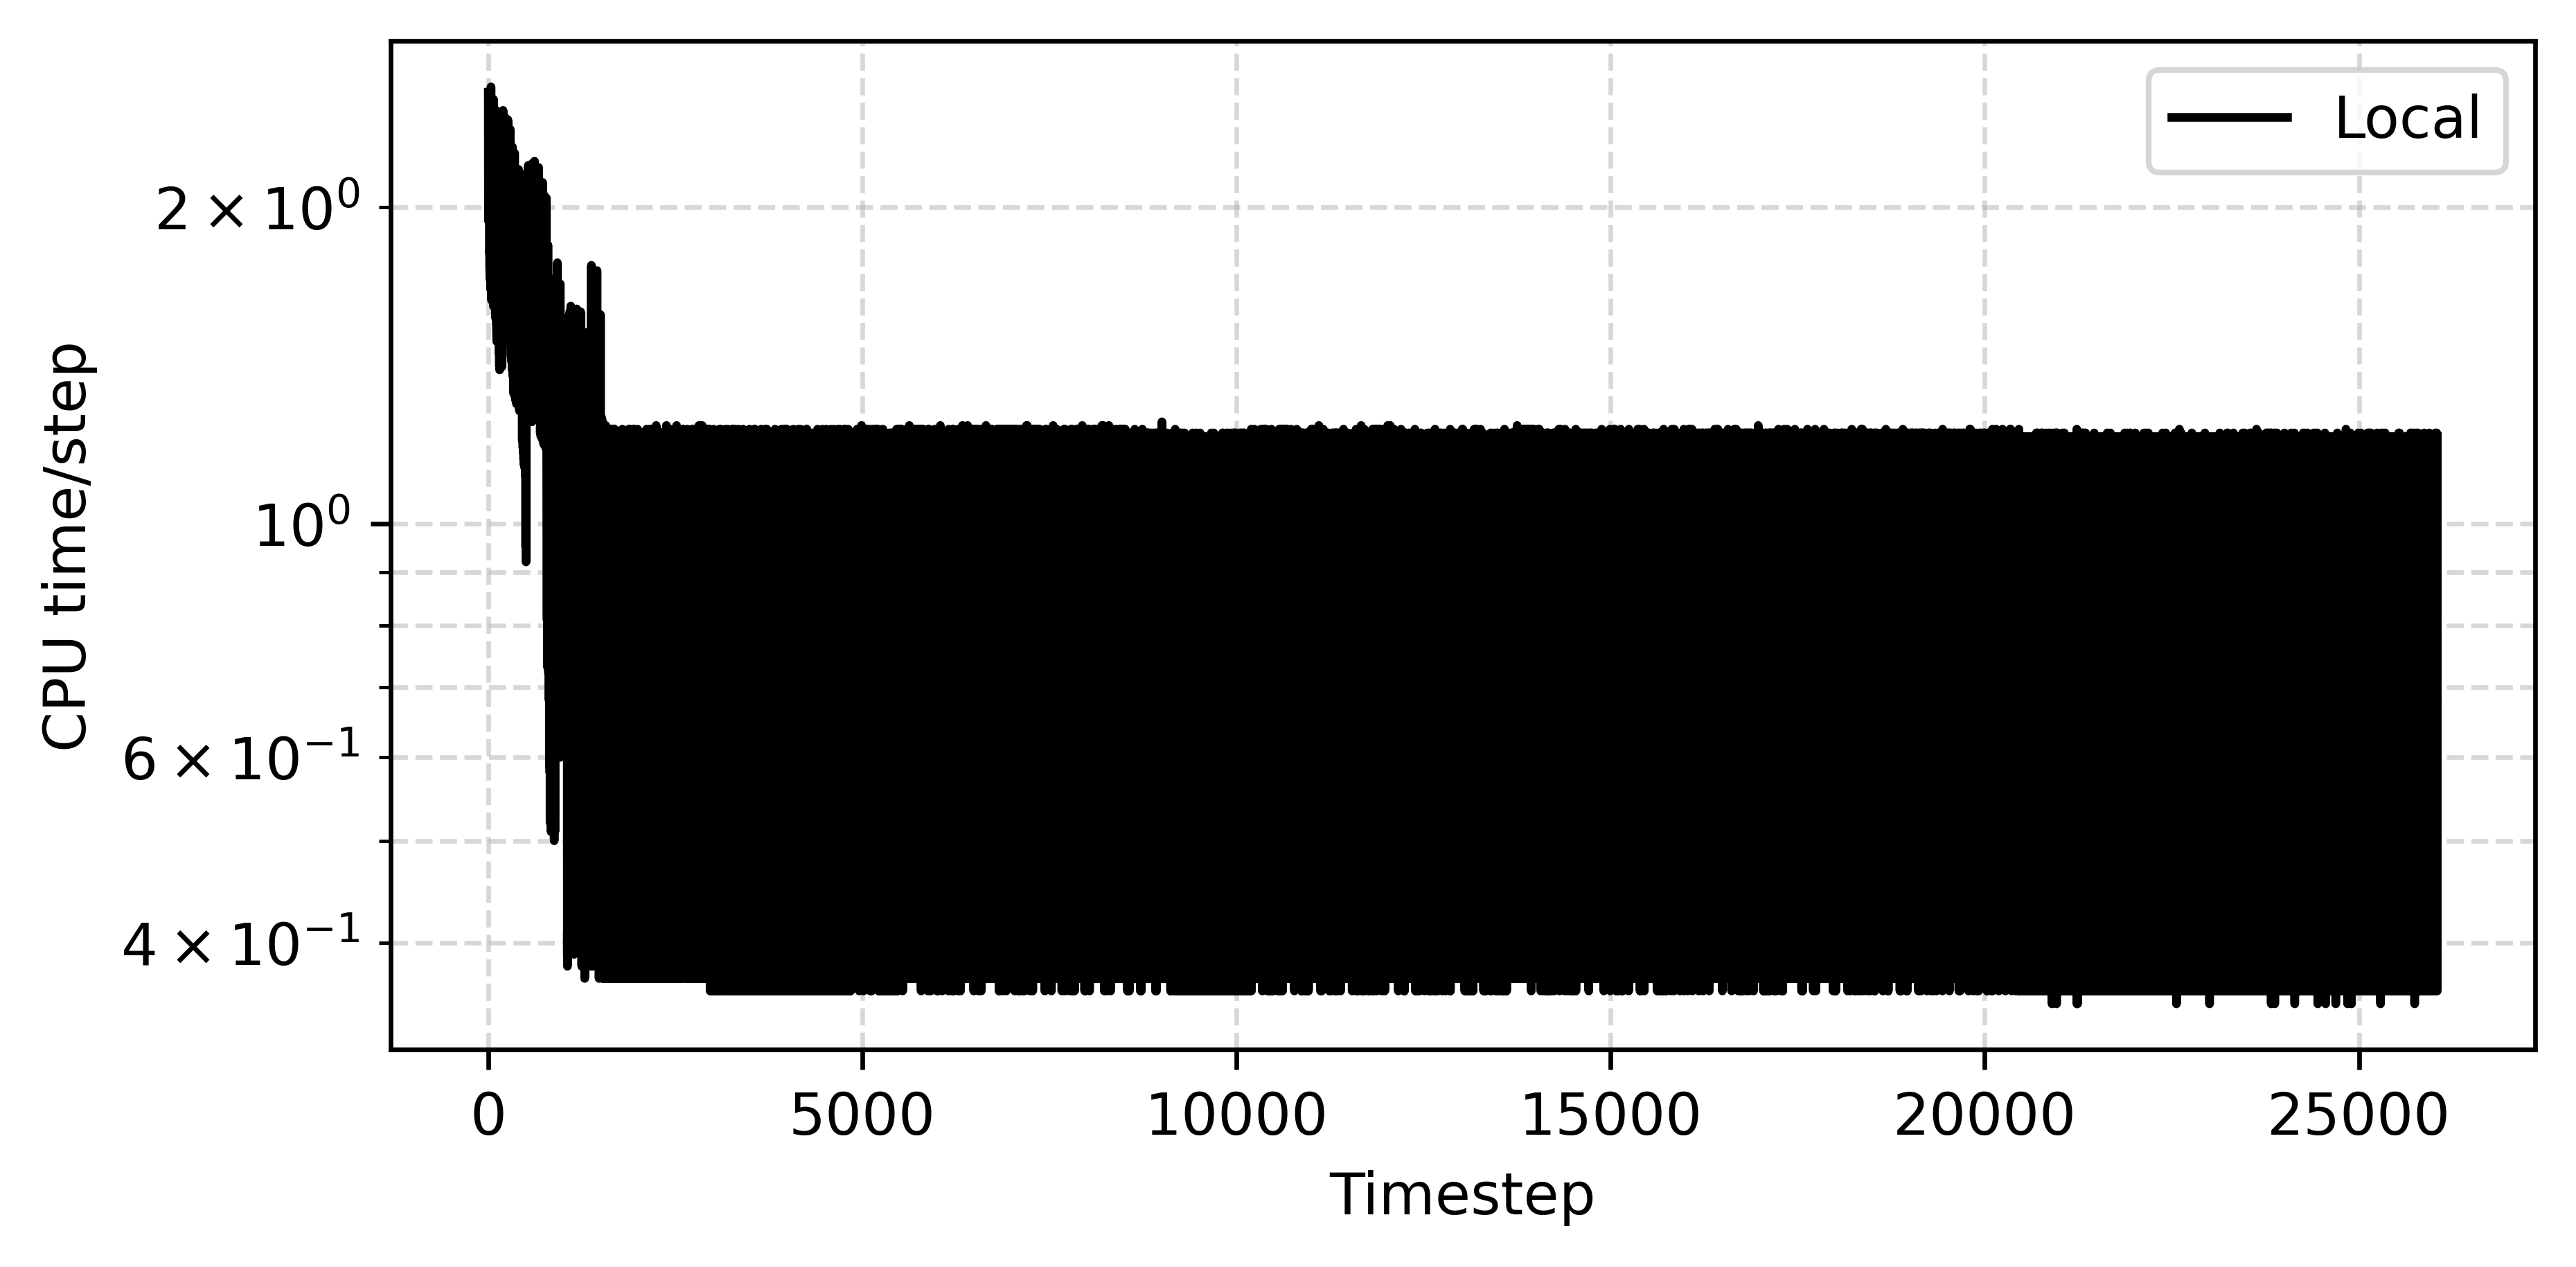

In [5]:
simulation_case = "U1_0_1_U2_0_1"

Courant_number(simulation_case)
continuity_errors(simulation_case)
computation_time(simulation_case)

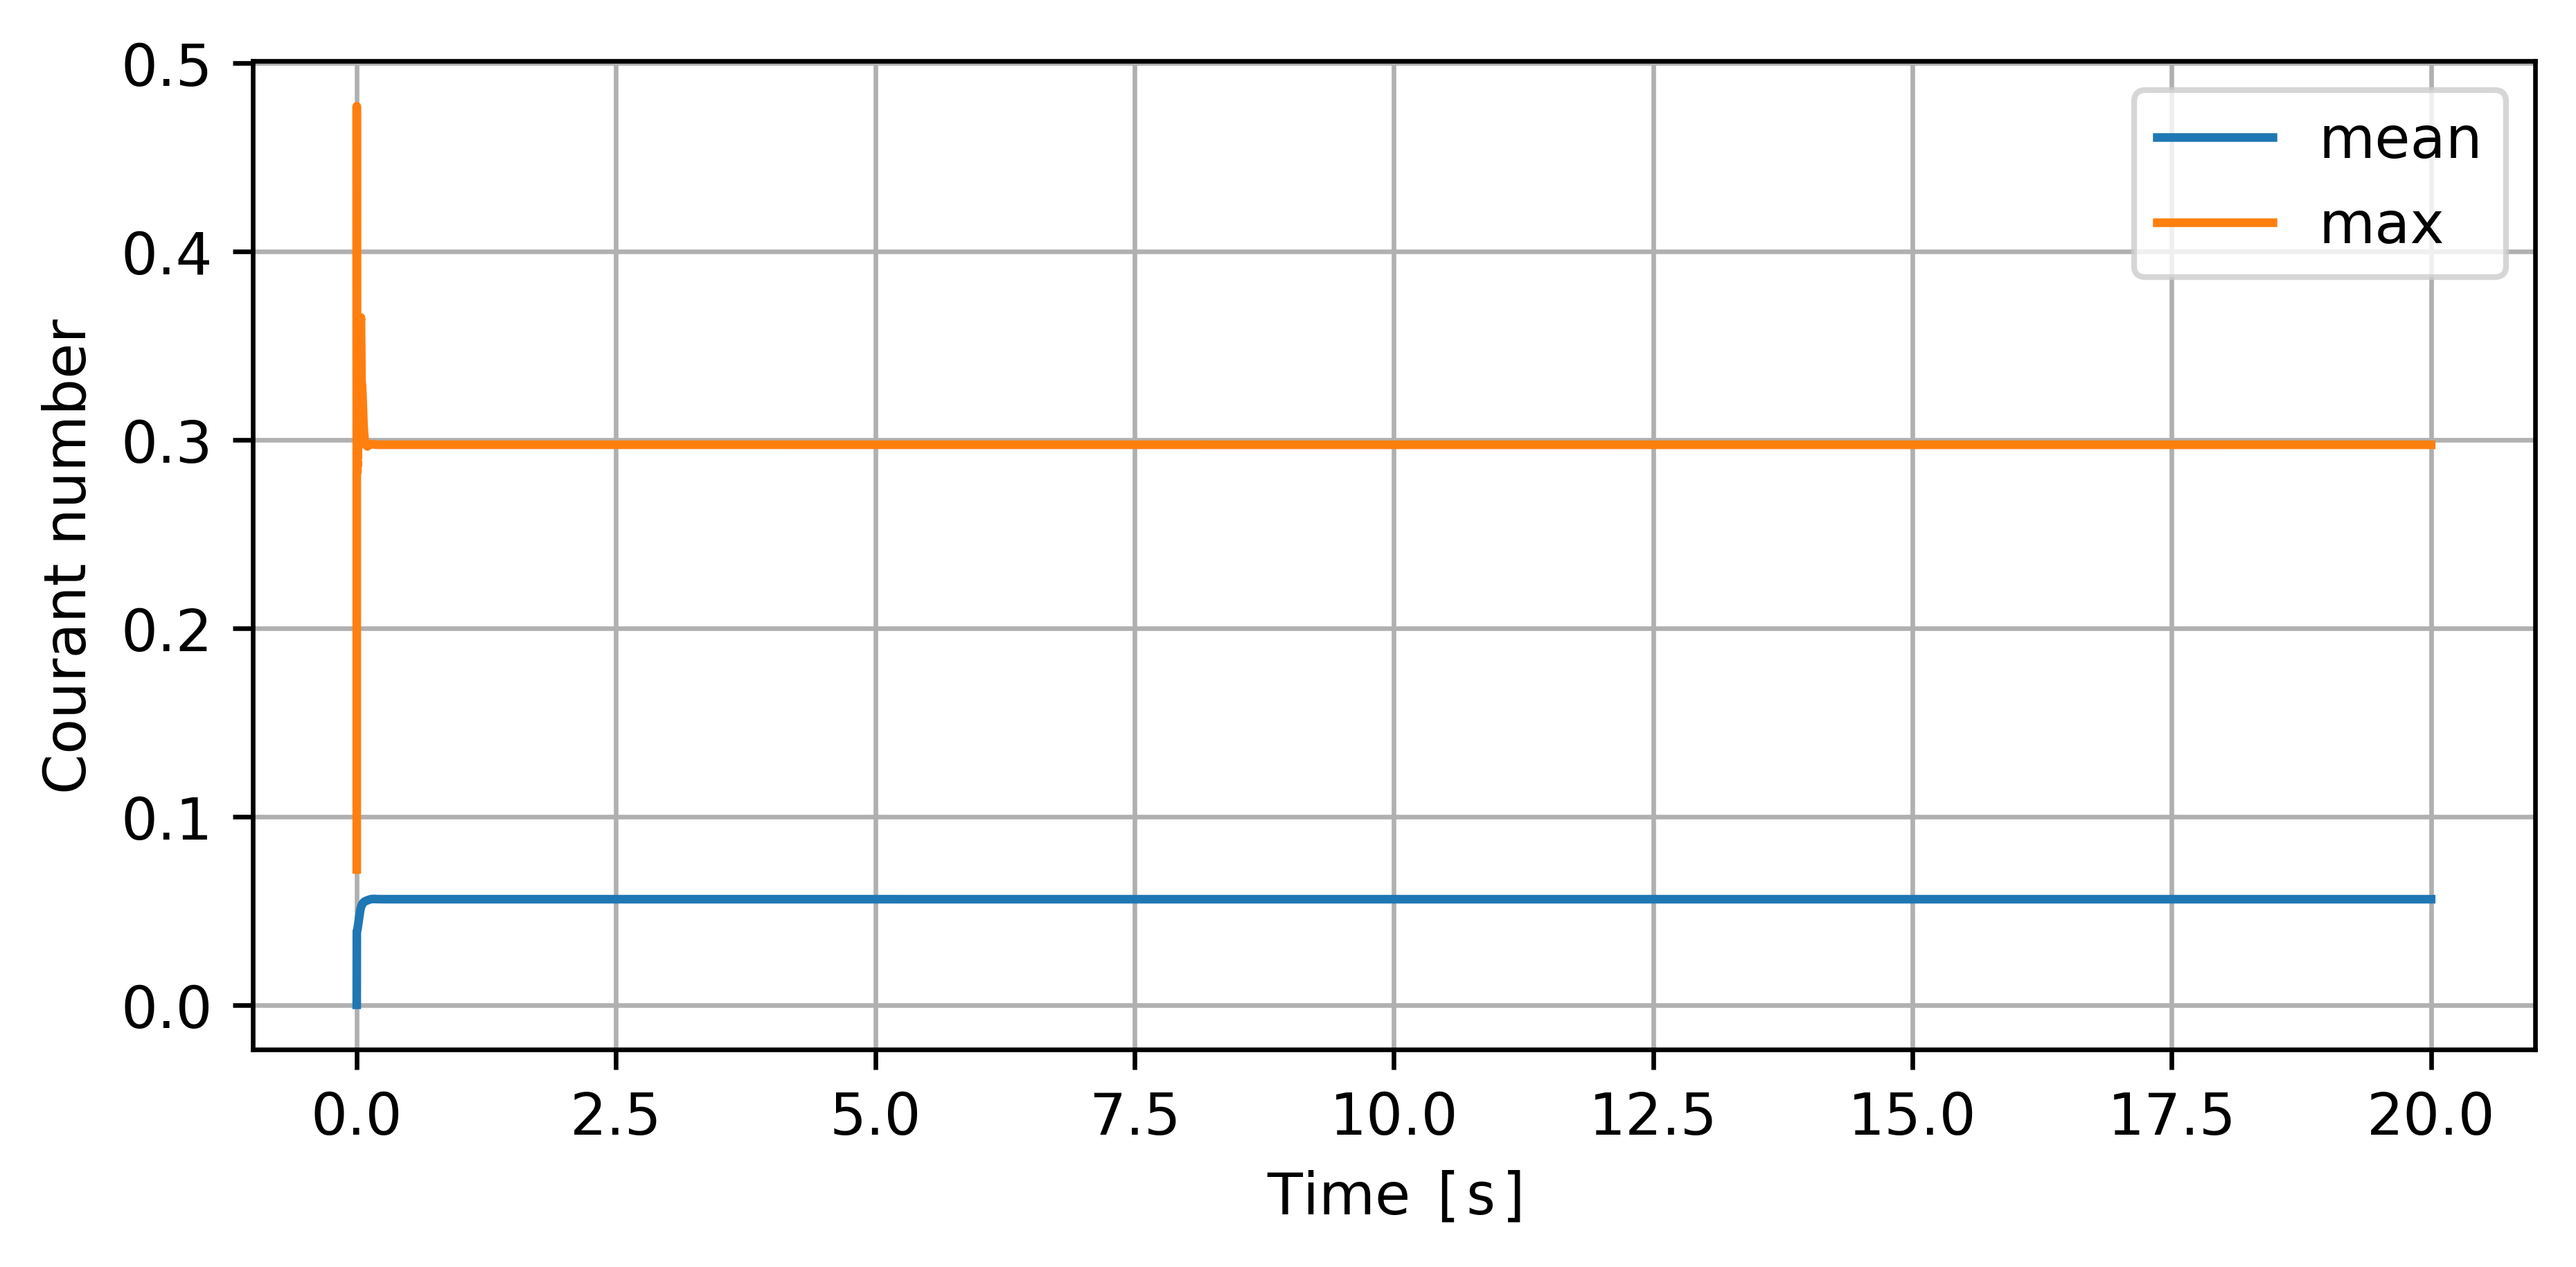

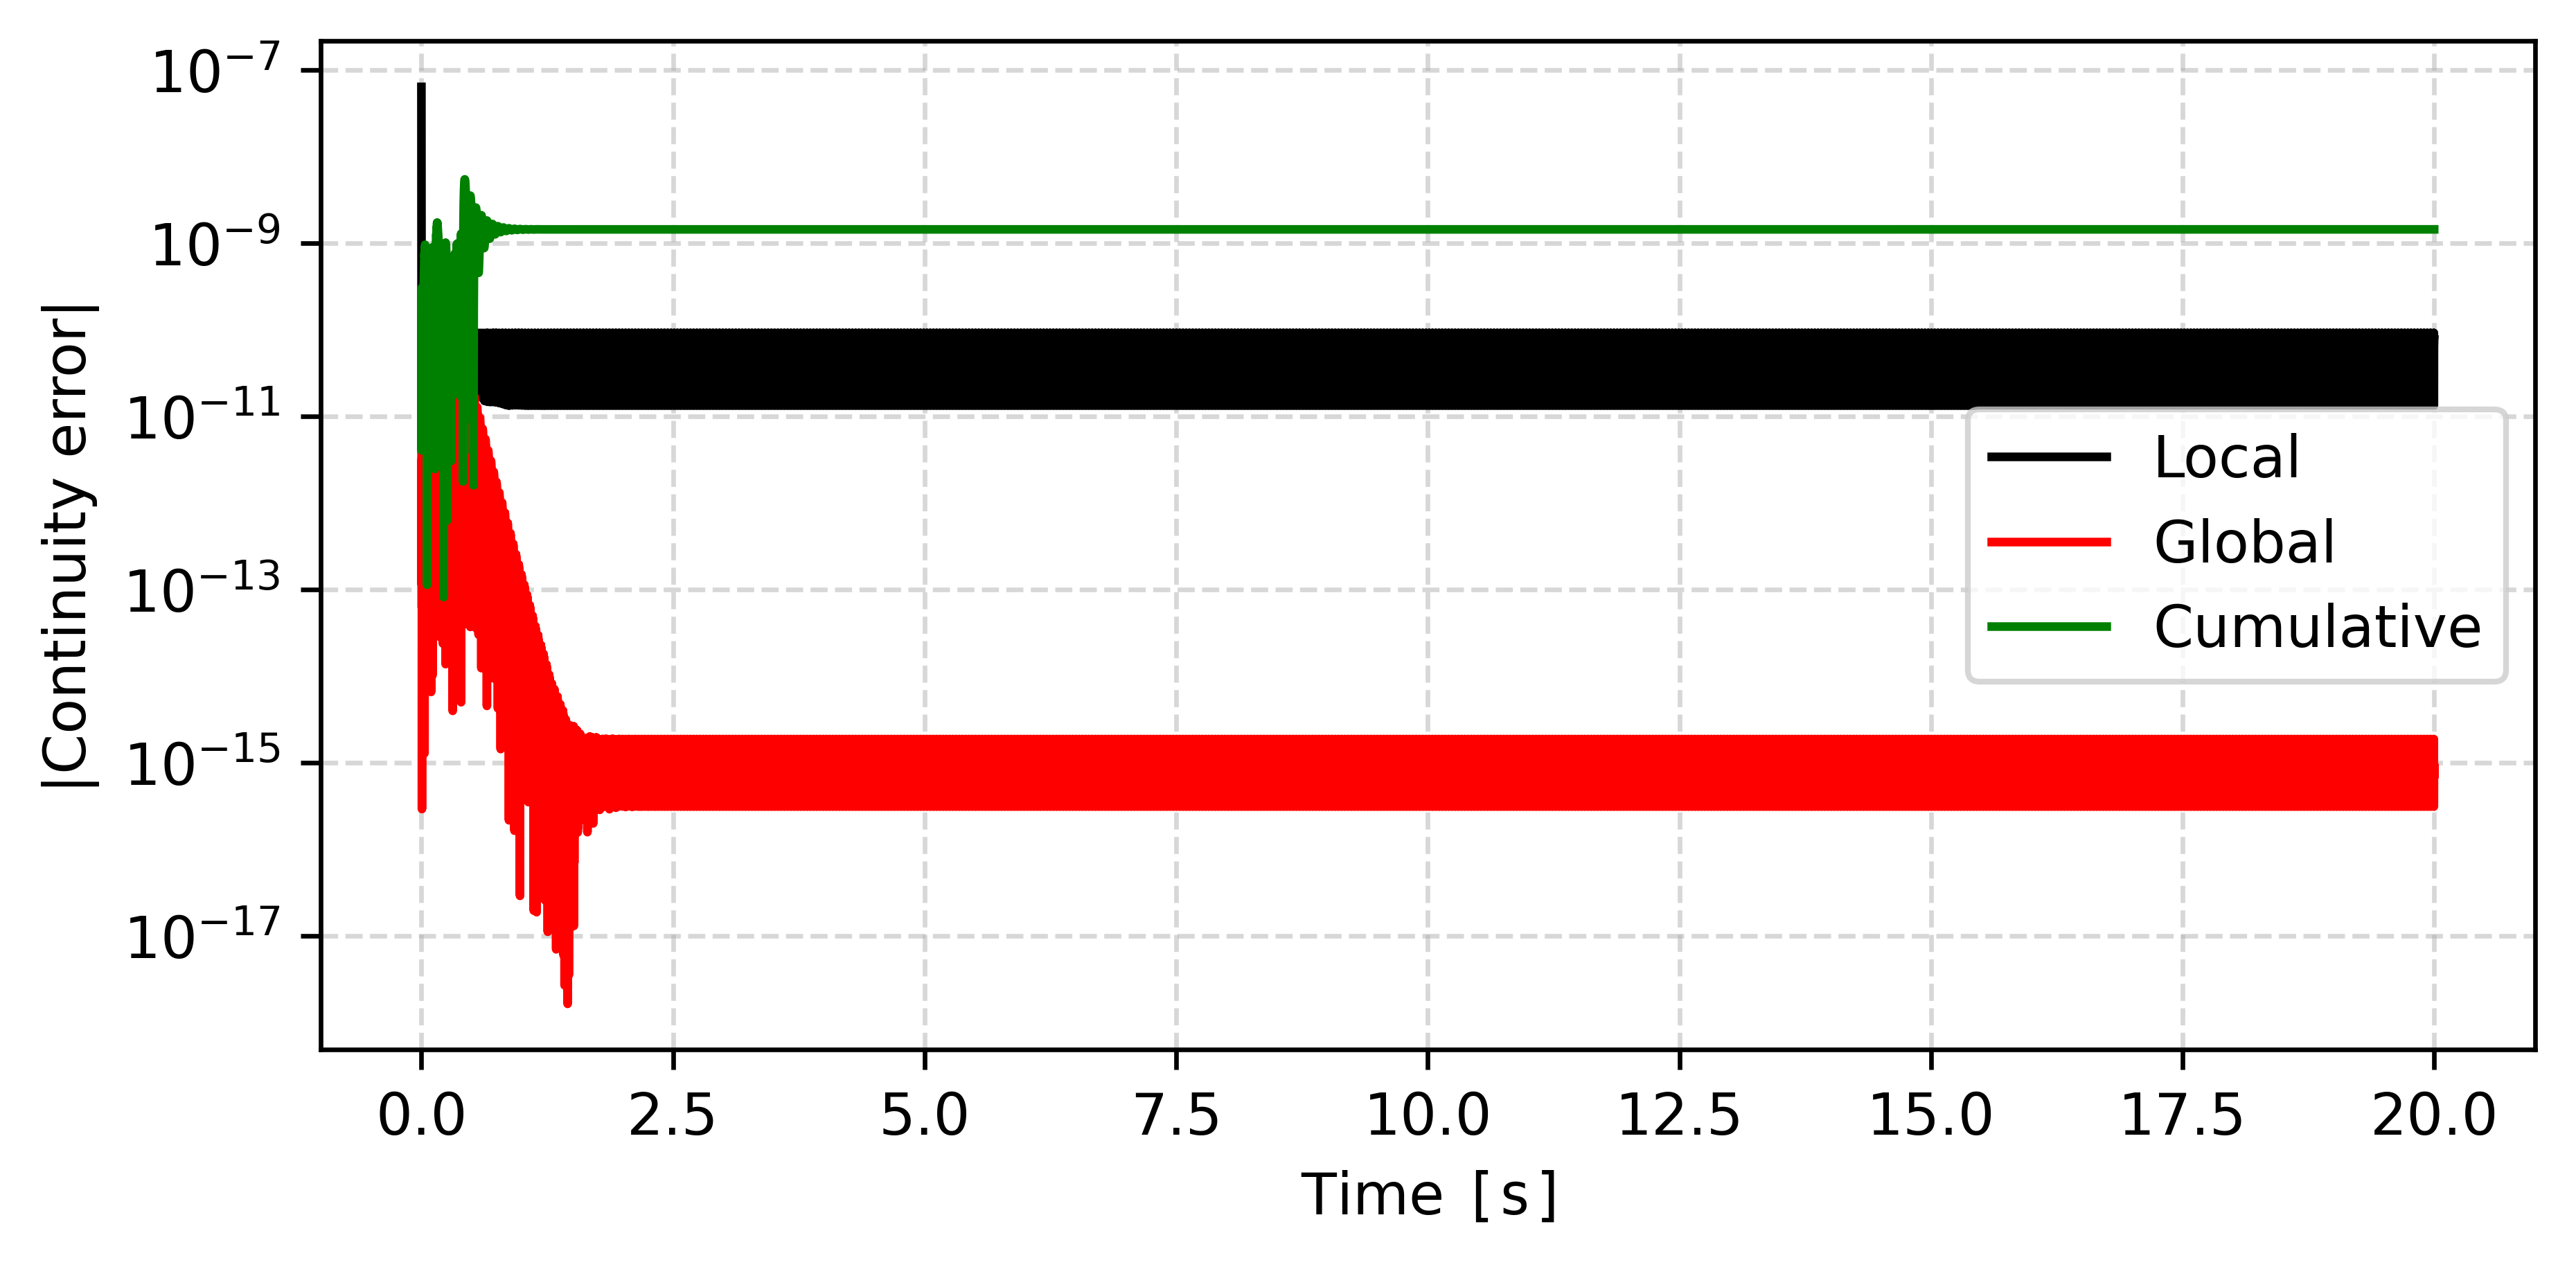

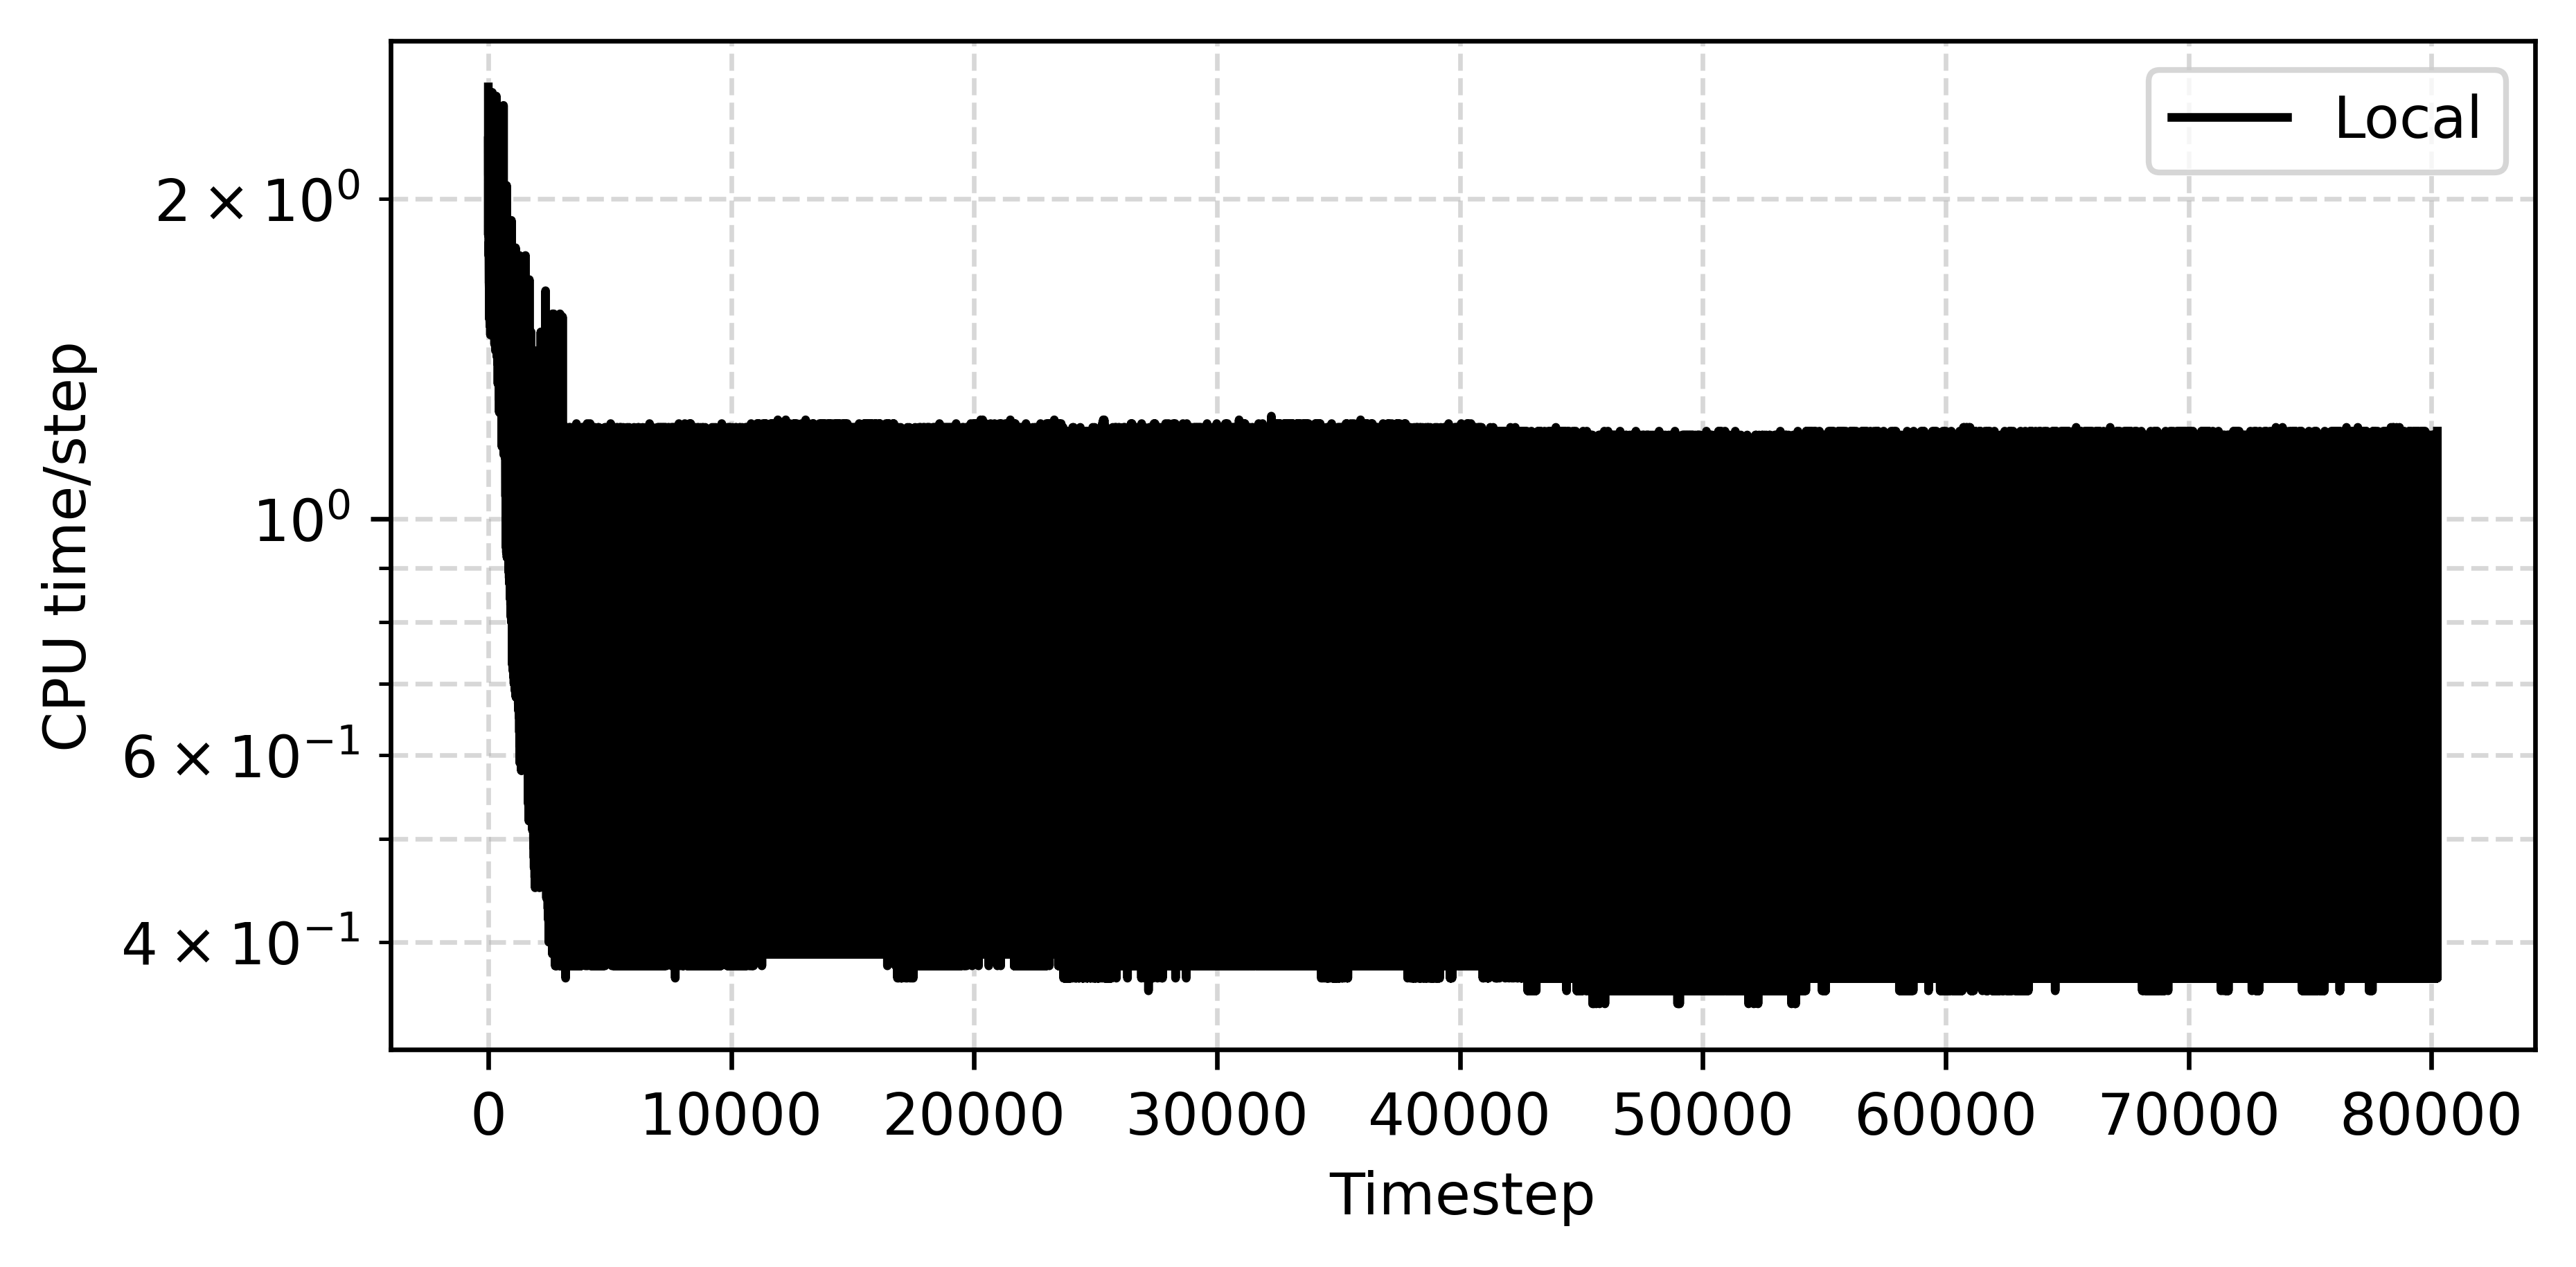

In [6]:
simulation_case = "U1_0_1_U2_0_6"

Courant_number(simulation_case)
continuity_errors(simulation_case)
computation_time(simulation_case)

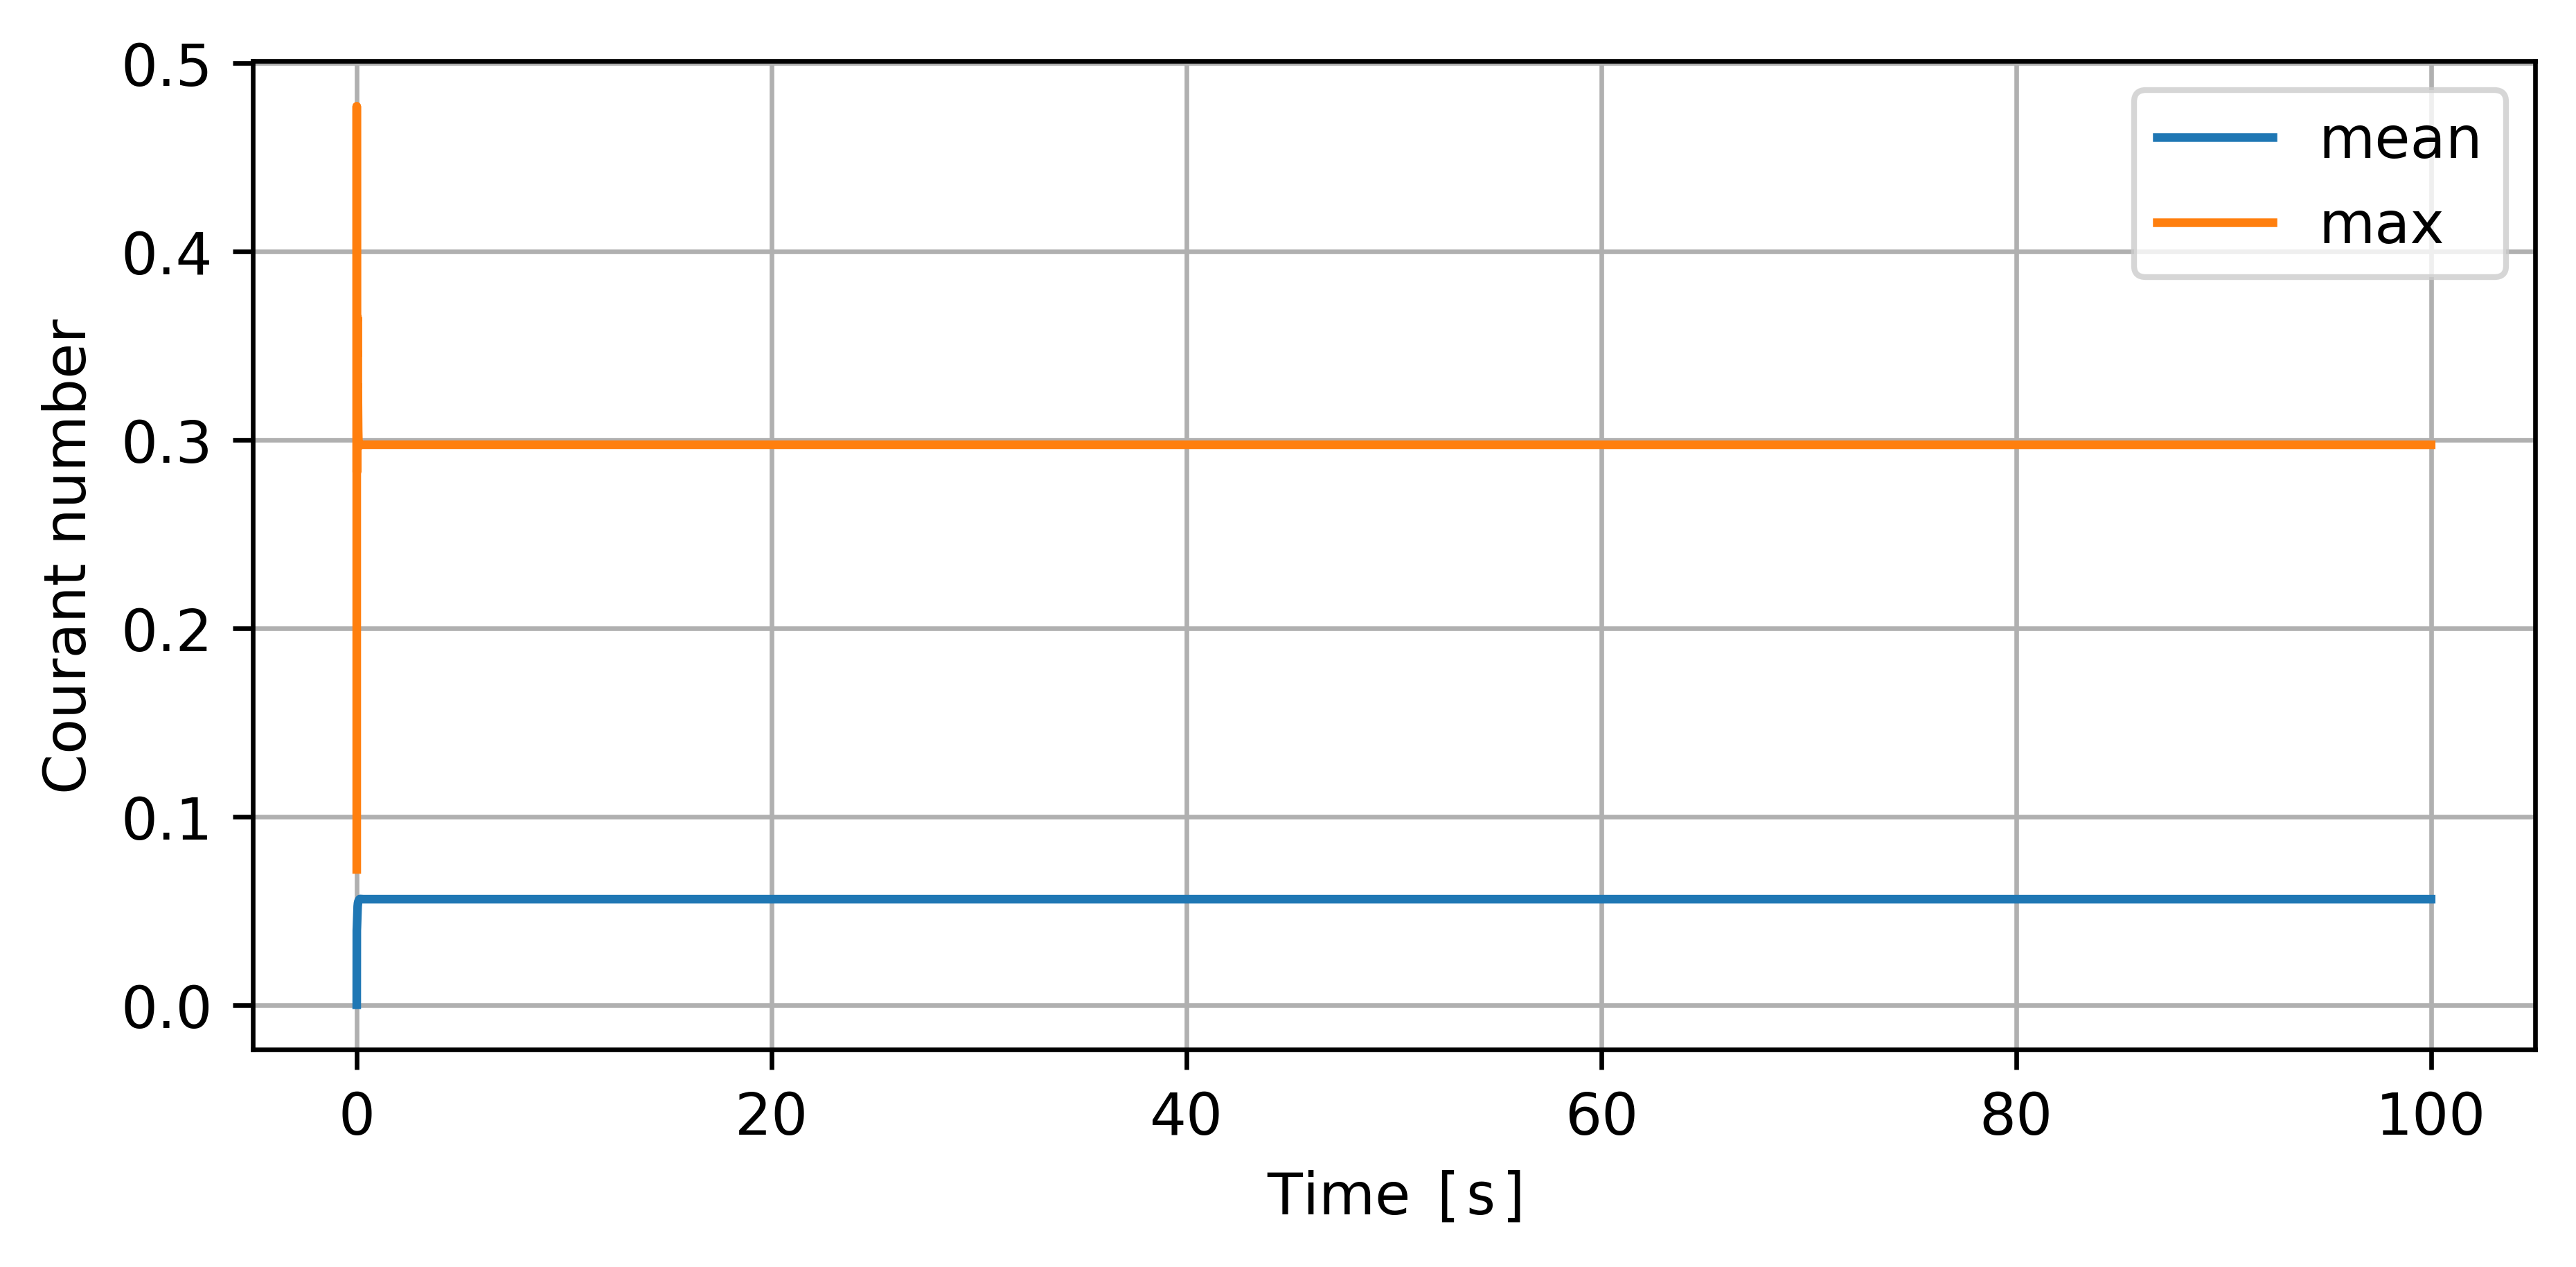

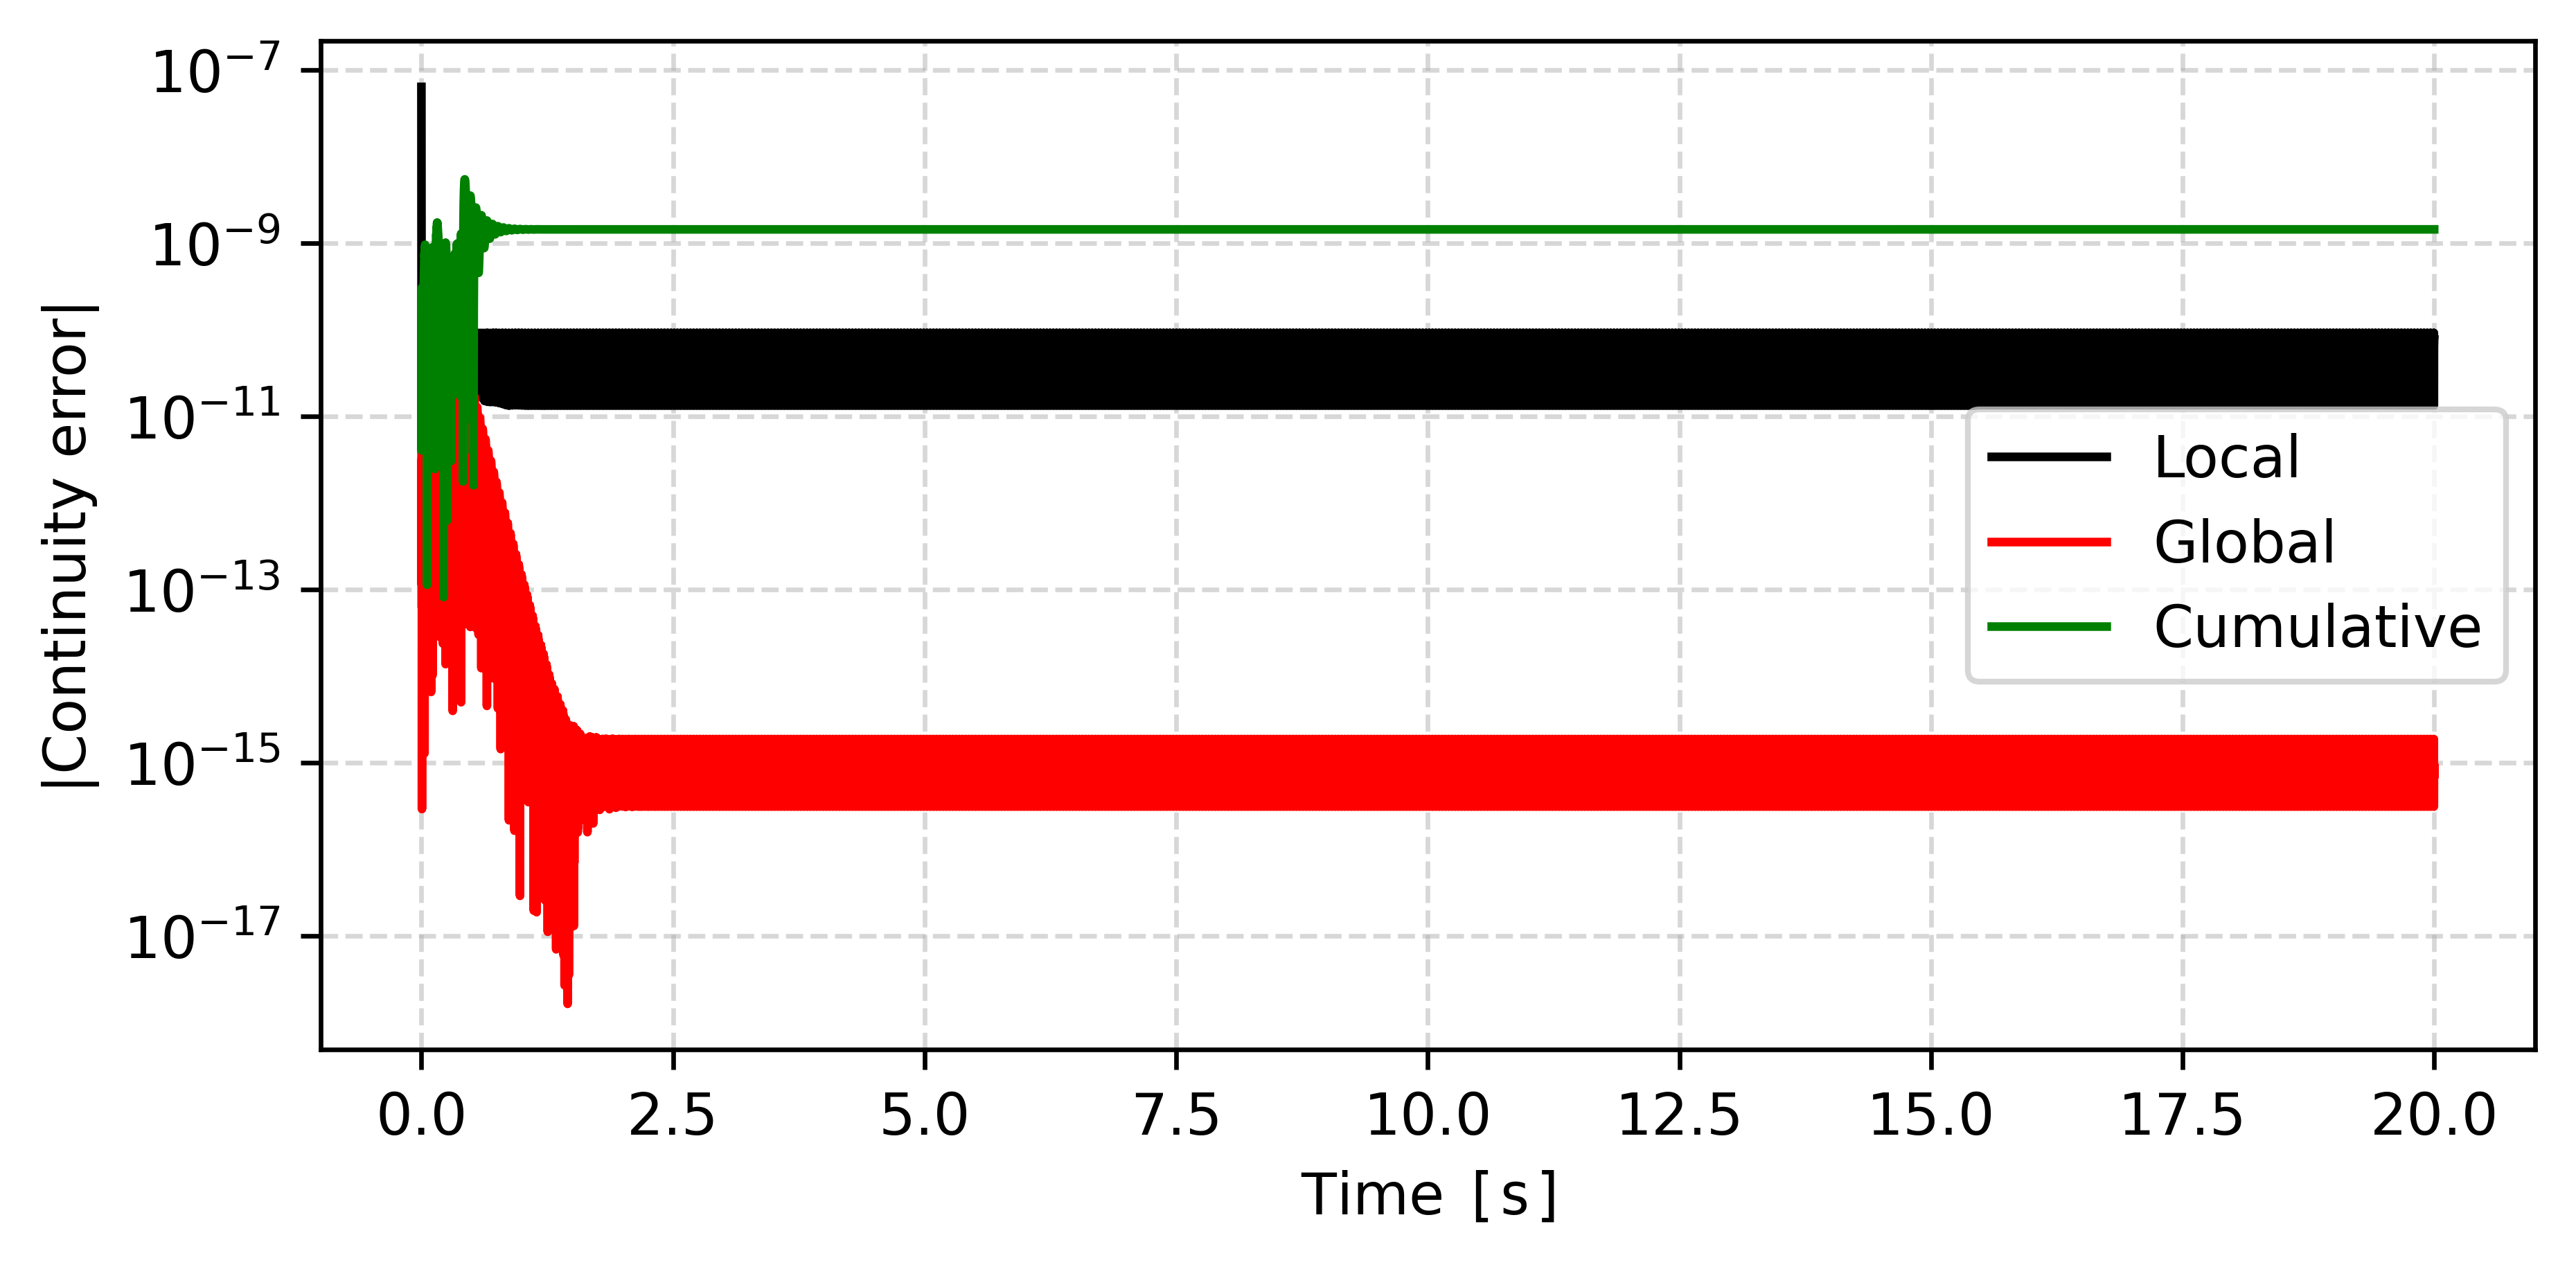

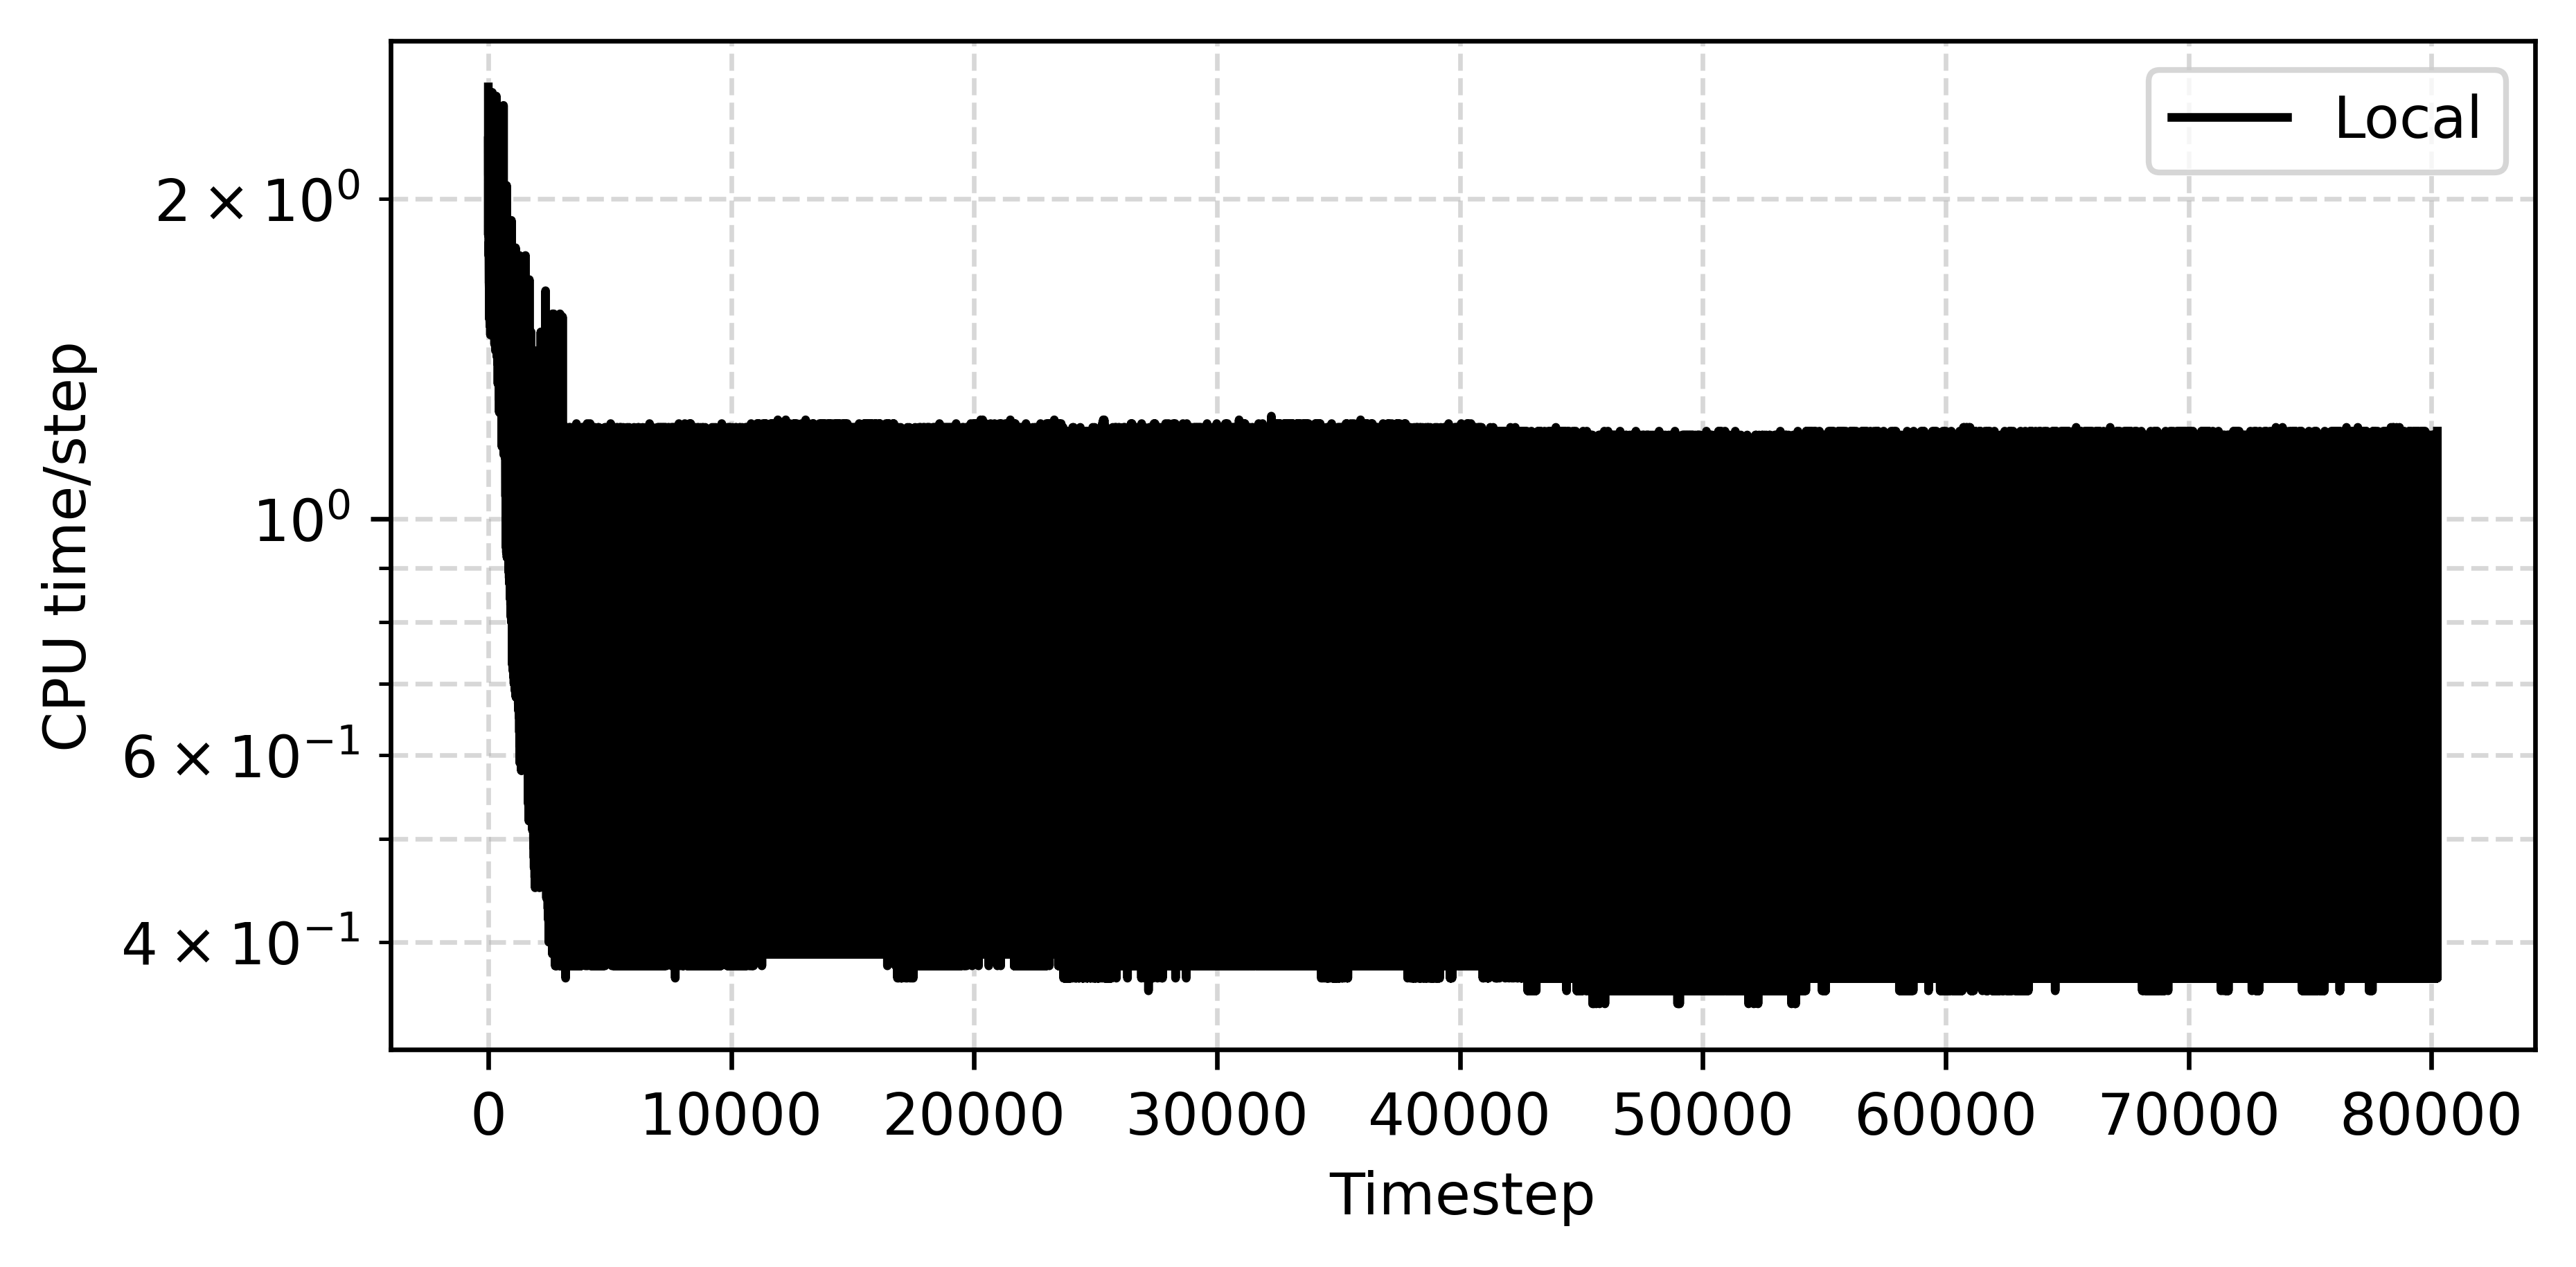

In [7]:
simulation_case = "U1_0_1_U2_0_6_long"

Courant_number(simulation_case)
continuity_errors(simulation_case)
computation_time(simulation_case)

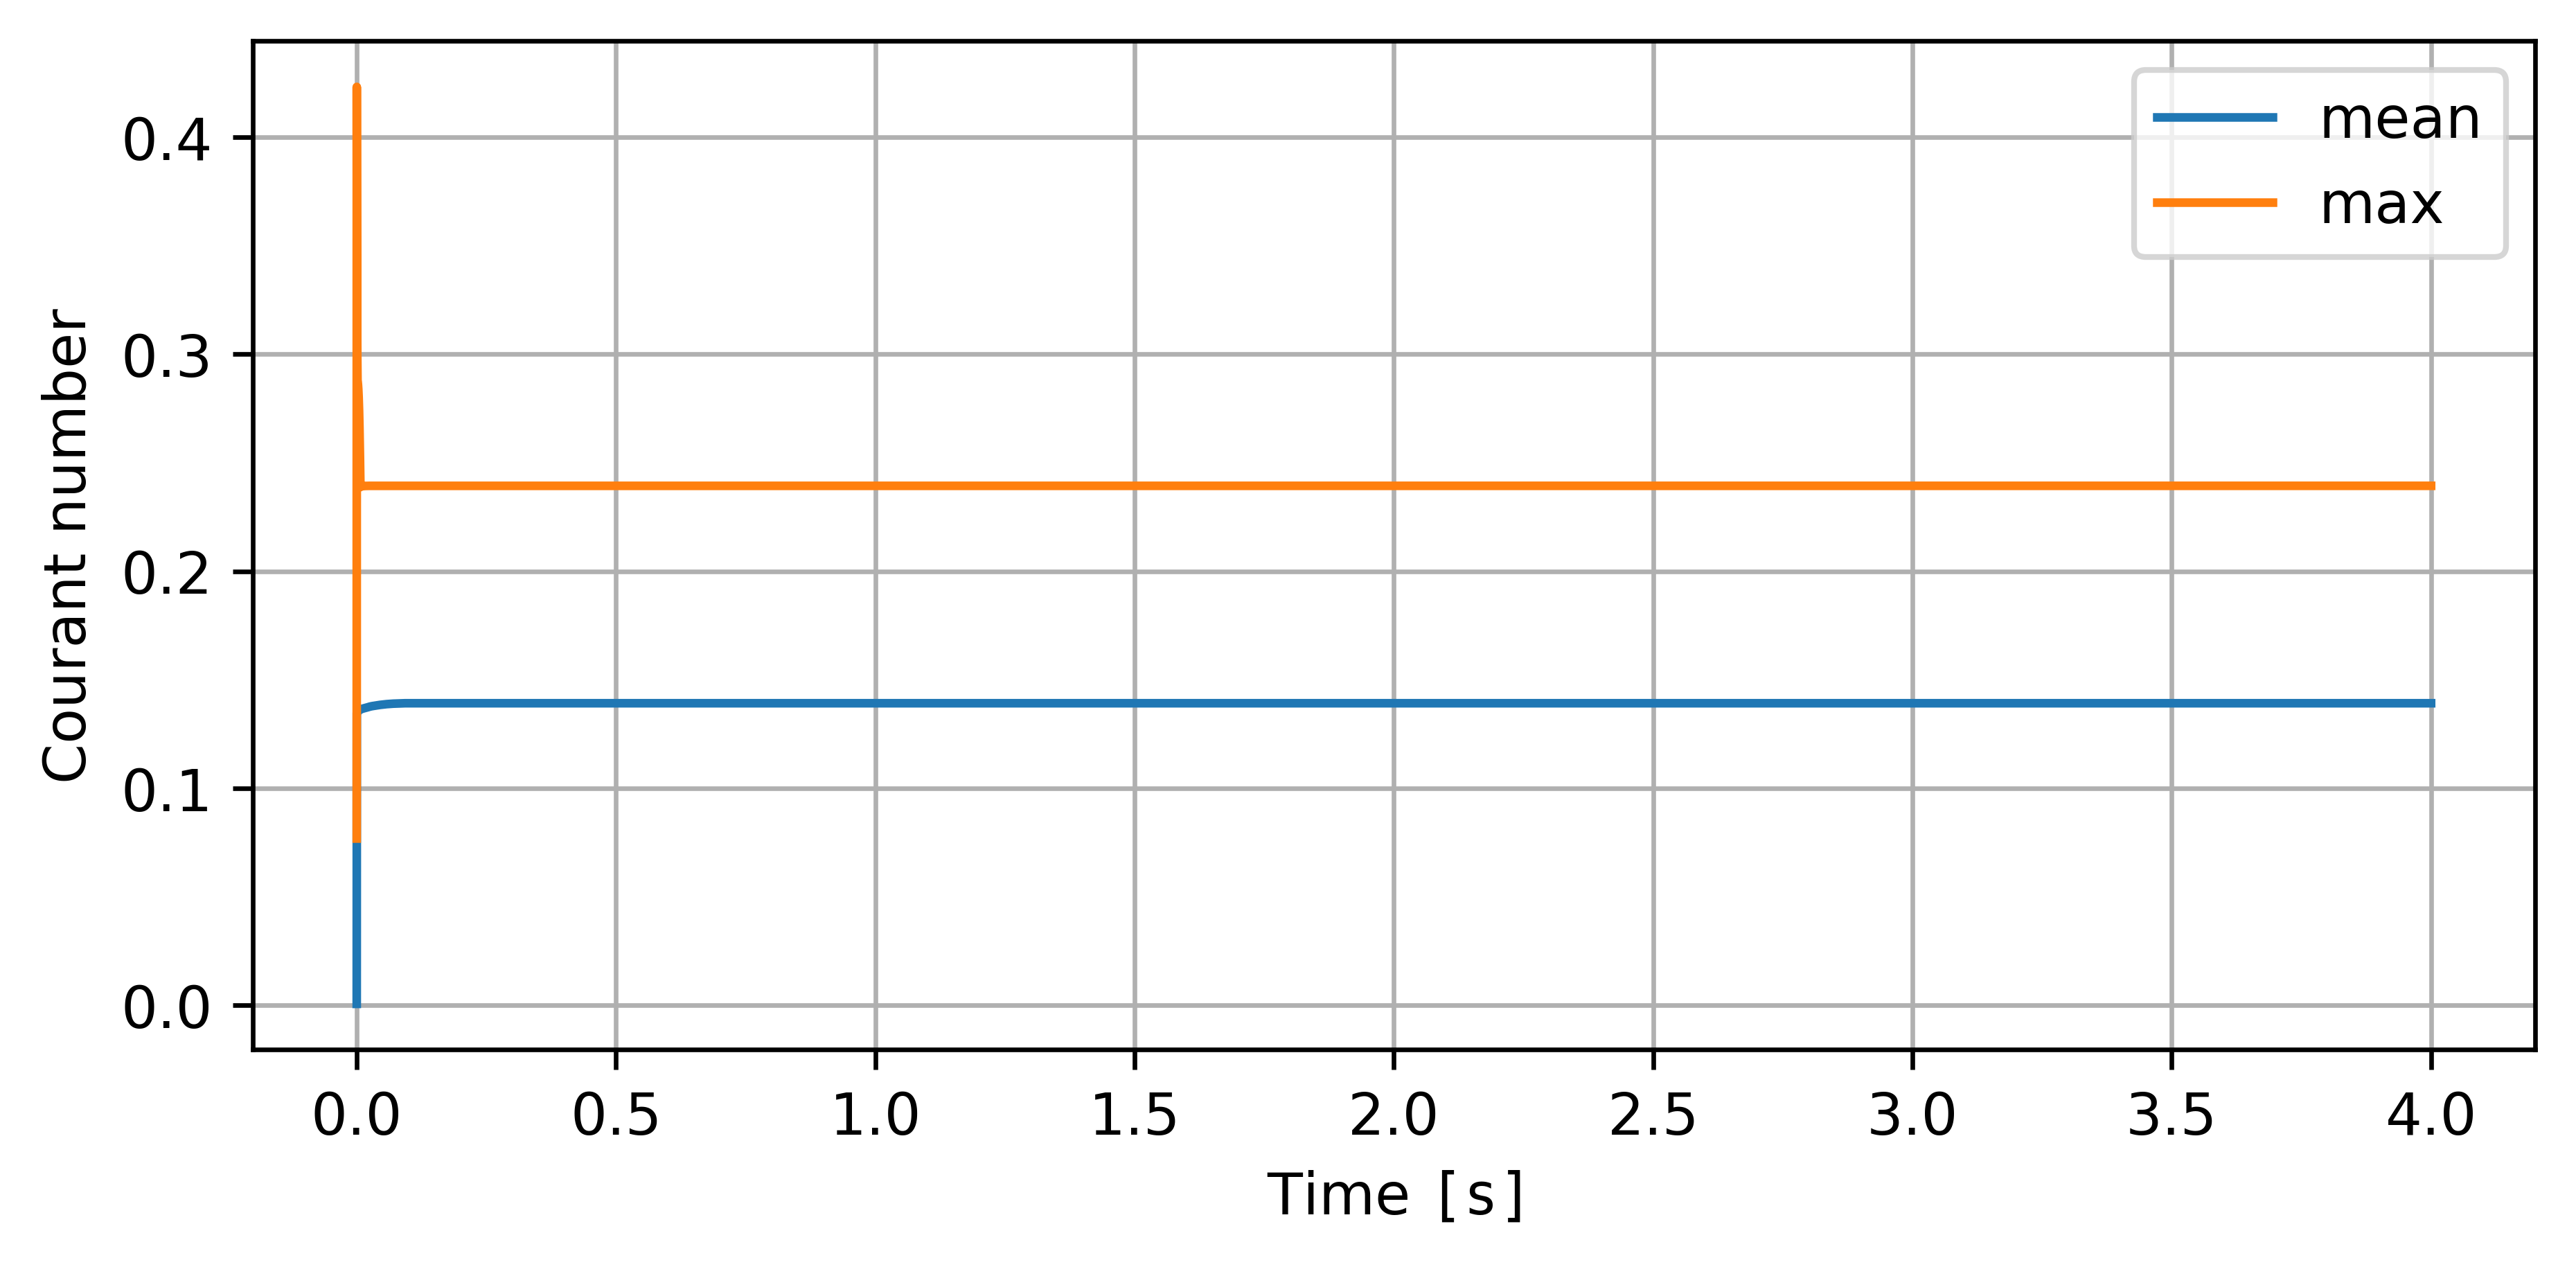

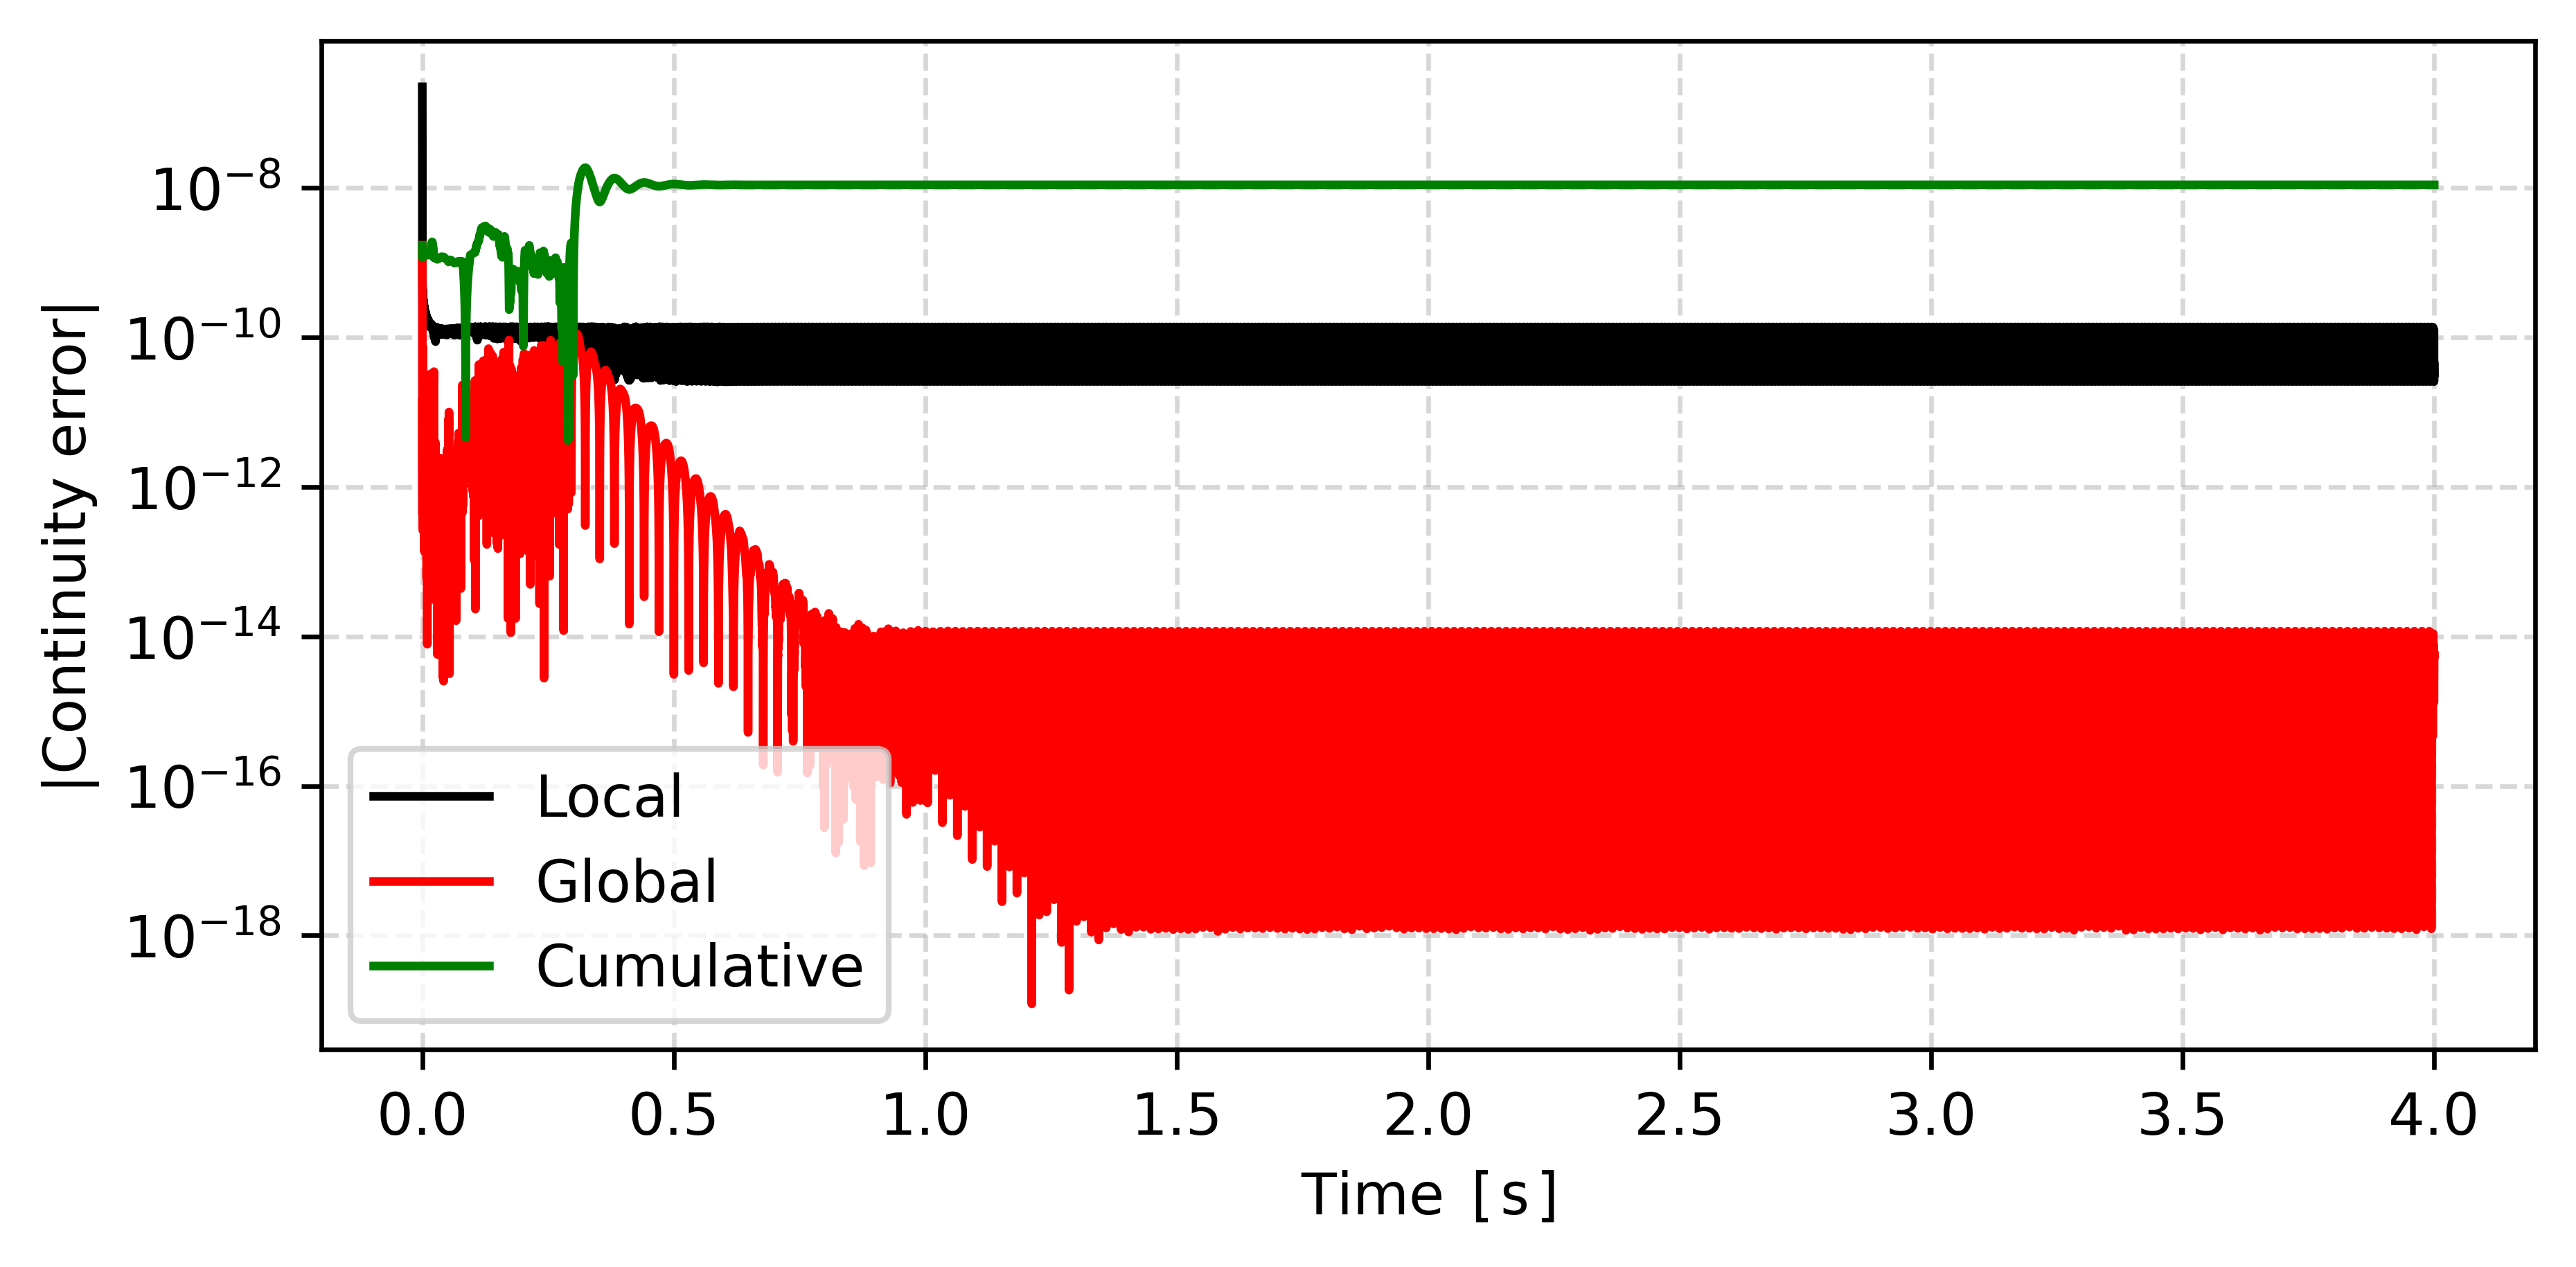

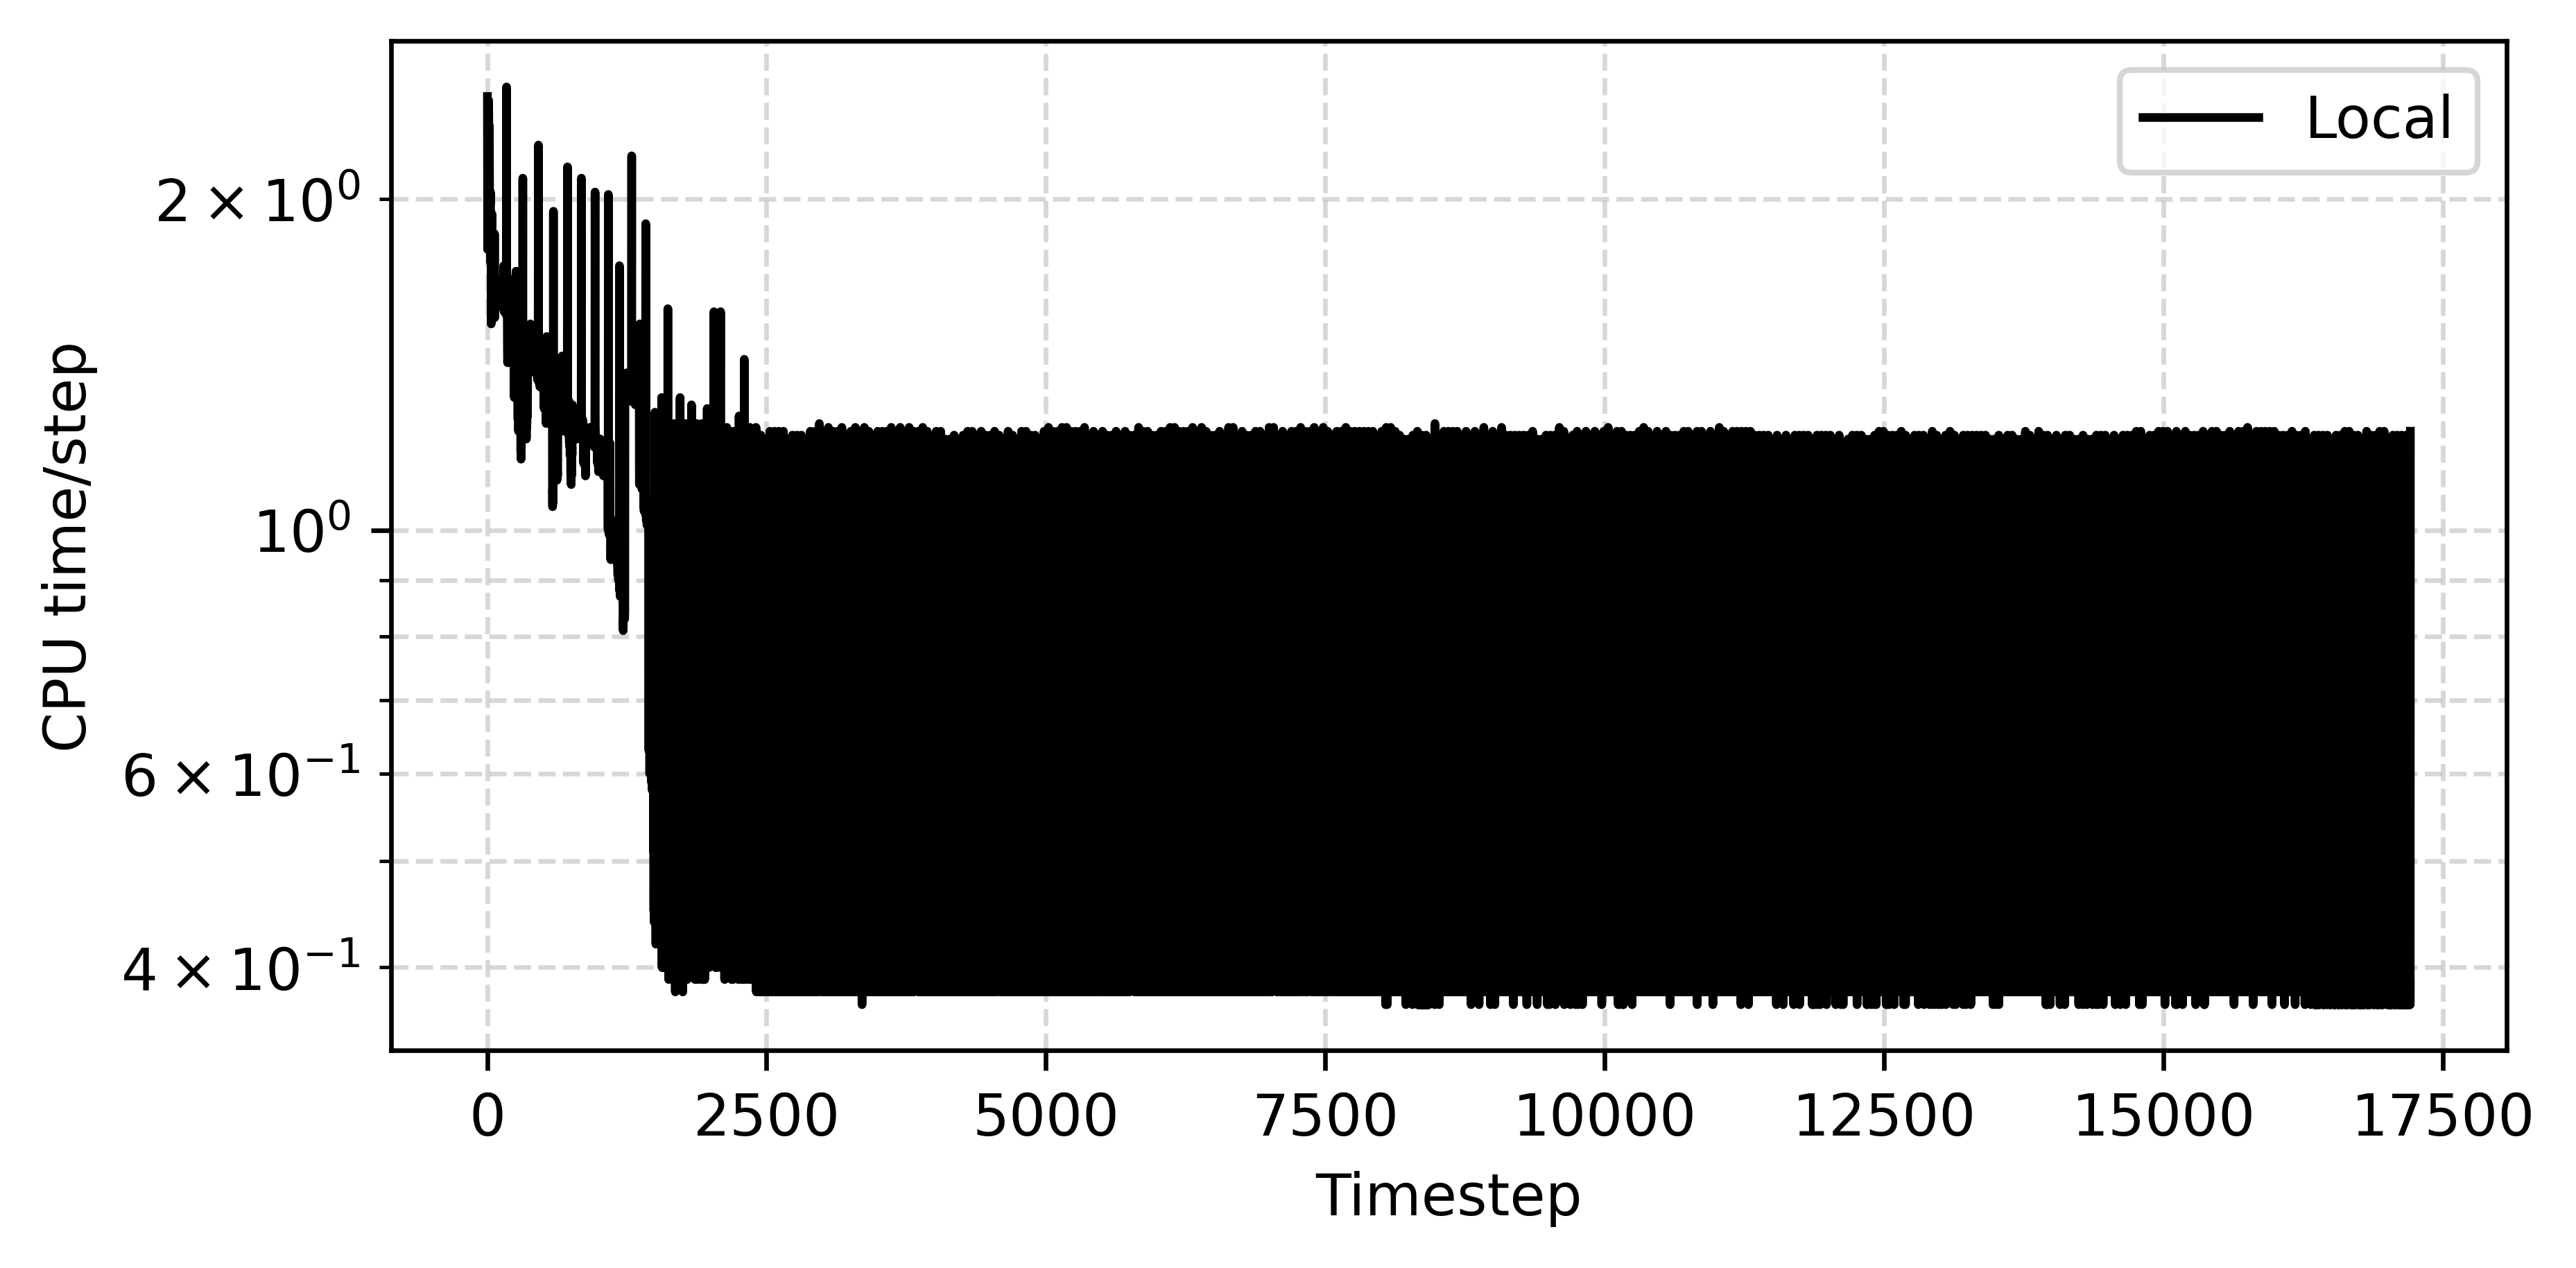

In [8]:
simulation_case = "U1_0_6_U2_0_1"

Courant_number(simulation_case)
continuity_errors(simulation_case)
computation_time(simulation_case)